In [1]:
import pandas as pd
import copy
from statistical_analysis.univariate_analysis import feature_uni_varaite_analysis
from statistical_analysis.individual_house_recode.individual_data_formatter import generate_formatted_children_under_five 
from statistical_analysis.bivariate_analysis import bi_variate_analysis
from statistical_analysis.bivariate_analysis import create_contingency_table

In [2]:
data = pd.read_csv("../../data/generate/merged_house_hold_children.csv")
data = data.drop_duplicates()

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_93779/2839242606.py:1: DtypeWarning: Columns (44,130,240) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../../data/generate/merged_house_hold_children.csv")


In [3]:
data.head()

Unnamed: 0 CASEID   Case Identification  HIDXA    Index to birth history   
0           0                     1   1  4                              1.0  \
1           1                     1   1  6                              1.0   
2           2                     1   5  2                              1.0   
3           3                     1   8  3                              1.0   
4           4                     1  11  2                              1.0   

  V000     Country code and phase  V001     Cluster number   
0                             NG8                      1.0  \
1                             NG8                      1.0   
2                             NG8                      1.0   
3                             NG8                      1.0   
4                             NG8                      1.0   

   V002     Household number  V003     Respondent's line number   
0                        1.0                                4.0  \
1                        1.0                                6.0   
2                        5.0                                2.0   
3                        8.0                                3.0   
4                       11.0                                2.0   

   V004     Ultimate area unit   
0                          1.0  \
1                          1.0   
2                          1.0   
3                          1.0   
4                          1.0   

   V005     Women's individual sample weight (6 decimals)   
0                                          1060257.0       \
1                                          1060257.0        
2                                          1060257.0        
3                                          1060257.0        
4                                          1060257.0        

   V006     Month of interview  ...  SREGION  Region  SBONNY   Bonny State   
0                         10.0  ...    North Central                    No  \
1                         10.0  ...    North Central                    No   
2                         10.0  ...    North Central                    No   
3                         10.0  ...    North Central                    No   
4                         10.0  ...    North Central                    No   

   S104A    Had informal education  S104B    Type of informal education   
0                              NaN                                  NaN  \
1                              NaN                                  NaN   
2                              NaN                                  NaN   
3                              NaN                                  NaN   
4                              NaN                                  NaN   

   S211     Number of births 2016-2021  IDX95    Index to Birth History   
0                                  1.0                              1.0  \
1                                  1.0                              1.0   
2                                  1.0                              1.0   
3                                  1.0                              1.0   
4                                  2.0                              1.0   

   S411A    Referred to higher level of care   
0                                        NaN  \
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        Yes   

  S415A    Fever went away after took ACT New ID   
0                                     NaN      1  \
1                                     NaN      1   
2                                     NaN      5   
3                                     Yes      8   
4                                      No     11   

  HML32$01 Final result of malaria from blood smear test  
0                                           Negative      
1                                           Negative      
2                             

In [4]:
# cols = ['V024', 'V025', 'V101', 'V102', 'V106', 'V107', 'V113', 'V130','V131','V136','V137','V149','V151','V152','V155','V190','ML101','V459','V460','BORD','B1','B4','B8','V218','M14','M49A','ML1','ML0','SLGA','SREGION','SBONNY']
# common_elements = []
# for element_A in data.columns:
#     for substring_B in cols:
#         if substring_B in element_A:
#             common_elements.append(element_A)
#             break

In [5]:
data.shape

(10988, 362)

In [6]:
data['ML503H   Malaria can be prevented by: put mosquito screen on windows'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
for i in data.columns:
 if i.find('window') != -1:
  print(i)

ML503H   Malaria can be prevented by: put mosquito screen on windows


In [8]:
elements = ['V024     Region',
 'V025     Type of place of residence',
 'V101     Region',
 'V102     Type of place of residence',
 'V106     Highest educational level',
 'V107     Highest year of education',
 'V113     Source of drinking water',
 'V130     Religion',
 'V131     Ethnicity',
 'V136     Number of household members (listed)',
 'V137     Number of children 5 and under in household (de jure)',
 'V149     Educational attainment',
 'V151     Sex of household head',
 'V152     Age of household head',
 'V155     Literacy',
 'V190     Wealth index combined',
 'V190A    Wealth index for urbanrural',
 'ML101    Type of mosquito bed net(s) slept under last night',
 'V459     Have mosquito bed net for sleeping (from household questionnaire)',
 'V460     Children under 5 slept under mosquito bed net last night (household questionnaire)',
 'BORD     Birth order number',
 'B1       Month of birth',
 'B4       Sex of child',
 'B8       Current age of child',
 'V218     Number of living children',
 'M14      Number of antenatal visits during pregnancy',
 'M49A     During pregnancy took: SPfansidar for malaria',
 'ML1      Number of times took fansidar during pregnancy',
 'ML0      Type of mosquito bed net(s) child slept under last night',
 'SLGA     Local government area',
 'B19      Current age of child in months (months since birth for dead children)',
  "HW1      Child's age in months",
 'SREGION  Region',
 'SBONNY   Bonny State',
            'HML32$01 Final result of malaria from blood smear test']

In [9]:
def to_number(value):
    if not isinstance(value, (int, float)):
        return None
    return float(value)
children_under_5 = copy.deepcopy(data[elements])
min_age = children_under_5["HW1      Child's age in months"].min()
max_age = children_under_5["HW1      Child's age in months"].max()

In [10]:
print("Minimum age is ", min_age, " max age is ", max_age)

Minimum age is  0.0  max age is  59.0


In [11]:
children_under_5["HW1      Child's age in months"] =  pd.to_numeric(
        children_under_5["HW1      Child's age in months"], errors='coerce')
_cols_num_str = ["HW1      Child's age in months", "V107     Highest year of education"]
for col in _cols_num_str:
        children_under_5[col] = children_under_5[col].apply(to_number)

In [12]:
children_under_5.dropna(subset=['HML32$01 Final result of malaria from blood smear test'], inplace=True)

In [13]:
value_counts = children_under_5["V131     Ethnicity"].value_counts()

In [14]:
value_counts

V131     Ethnicity
Hausa           2909
Others          1691
Igbo/Ibo        1291
Fulani          1013
Yoruba           680
                ... 
Eket               1
Mangus/Manju       1
Kanawa             1
Idanre             1
Uzaurue            1
Name: count, Length: 161, dtype: int64

Feature Name:  V024     Region
Number of Unique Values:  37
Unique values: ['Benue' 'FCT' 'Kogi' 'Kwara' 'Nasarawa' 'Niger' 'Plateau' 'Adamawa'
 'Bauchi' 'Borno' 'Gombe' 'Taraba' 'Yobe' 'Jigawa' 'Kaduna' 'Kano'
 'Katsina' 'Kebbi' 'Sokoto' 'Zamfara' 'Abia' 'Anambra' 'Ebonyi' 'Enugu'
 'Imo' 'Akwa Ibom' 'Bayelsa' 'Cross River' 'Delta' 'Edo' 'Rivers' 'Ekiti'
 'Lagos' 'Ogun' 'Ondo' 'Osun' 'Oyo']
Number of unique elements: 37
Unique values and their counts:
V024     Region
Kano           571
Katsina        498
Bauchi         478
Kebbi          476
Kaduna         455
Sokoto         424
Jigawa         409
Niger          391
Zamfara        373
Taraba         372
Yobe           370
Nasarawa       366
Plateau        347
Borno          318
Rivers         302
Benue          299
Delta          297
Ebonyi         296
FCT            275
Adamawa        275
Abia           251
Gombe          239
Bayelsa        235
Anambra        212
Cross River    202
Imo            198
Enugu          197
Kwara          

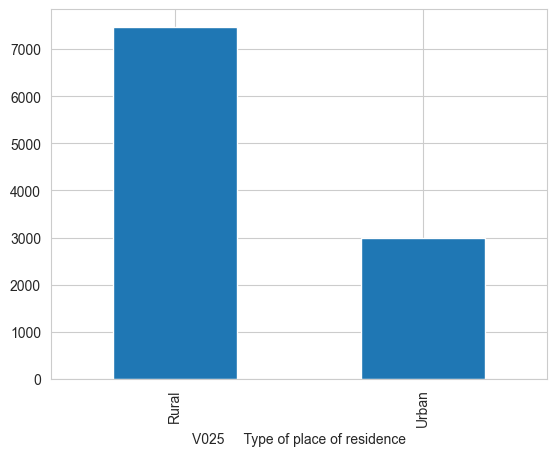

Unique values: ['Urban' 'Rural']
Number of unique elements: 2
Unique values and their counts:
V025     Type of place of residence
Rural    7475
Urban    2990
Name: count, dtype: int64
Error in feature:  V025     Type of place of residence
Feature Name:  V101     Region
Number of Unique Values:  37
Unique values: ['Benue' 'FCT' 'Kogi' 'Kwara' 'Nasarawa' 'Niger' 'Plateau' 'Adamawa'
 'Bauchi' 'Borno' 'Gombe' 'Taraba' 'Yobe' 'Jigawa' 'Kaduna' 'Kano'
 'Katsina' 'Kebbi' 'Sokoto' 'Zamfara' 'Abia' 'Anambra' 'Ebonyi' 'Enugu'
 'Imo' 'Akwa Ibom' 'Bayelsa' 'Cross River' 'Delta' 'Edo' 'Rivers' 'Ekiti'
 'Lagos' 'Ogun' 'Ondo' 'Osun' 'Oyo']
Number of unique elements: 37
Unique values and their counts:
V101     Region
Kano           571
Katsina        498
Bauchi         478
Kebbi          476
Kaduna         455
Sokoto         424
Jigawa         409
Niger          391
Zamfara        373
Taraba         372
Yobe           370
Nasarawa       366
Plateau        347
Borno          318
Rivers         302
Benu

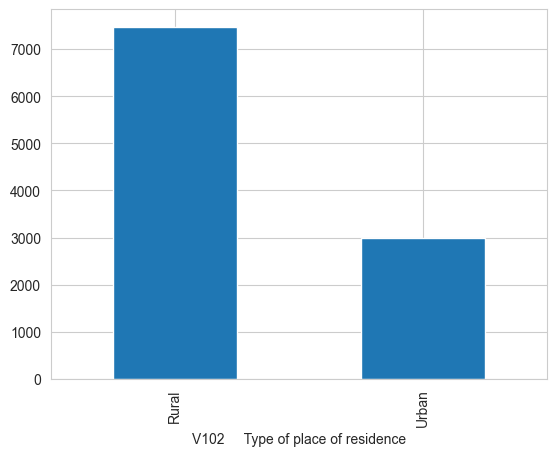

Unique values: ['Urban' 'Rural']
Number of unique elements: 2
Unique values and their counts:
V102     Type of place of residence
Rural    7475
Urban    2990
Name: count, dtype: int64
Error in feature:  V102     Type of place of residence
Feature Name:  V106     Highest educational level
Number of Unique Values:  4
Unique Values:  ['Secondary' 'Primary' 'Higher' 'No education']
Value Counts:  V106     Highest educational level
No education    4642
Secondary       3217
Primary         1561
Higher          1045
Name: count, dtype: int64


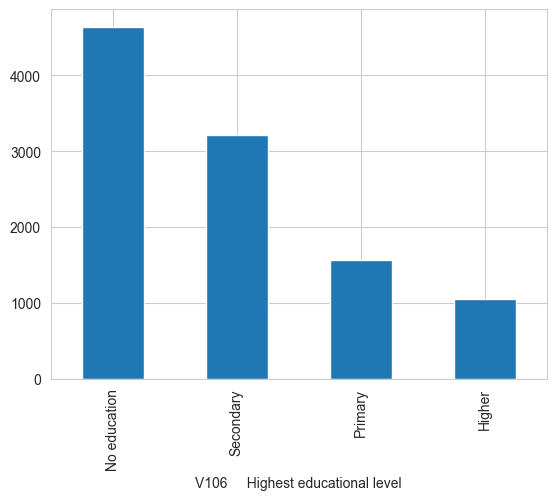

Unique values: ['Secondary' 'Primary' 'Higher' 'No education']
Number of unique elements: 4
Unique values and their counts:
V106     Highest educational level
No education    4642
Secondary       3217
Primary         1561
Higher          1045
Name: count, dtype: int64
Error in feature:  V106     Highest educational level
Feature Name:  V107     Highest year of education
Number of Unique Values:  6
Unique Values:  [nan  4.  5.  2.  6.  3.  1.]
Value Counts:  V107     Highest year of education
6.0    1035
3.0     293
4.0     236
5.0     146
2.0     131
1.0      30
Name: count, dtype: int64


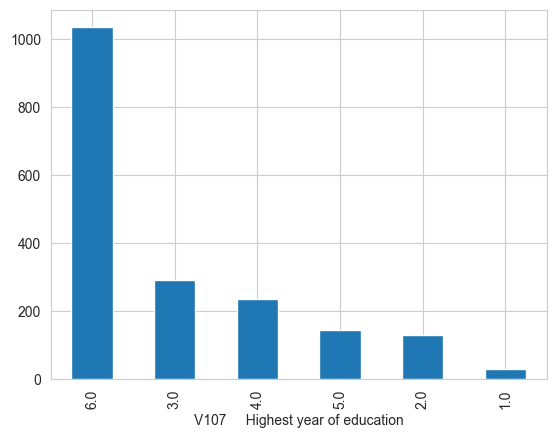

Data set description
DescribeResult(nobs=10465, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
Central Tendency and Dispersion:  {'Mean': 4.839657936932122, 'Median': 6.0, 'Mode': nan, 'Variance': nan, 'Standard Deviation': nan, 'Kurtosis': nan, 'Screw': nan}
Plotting the count plot


/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/statistical_analysis/univariate_analysis.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


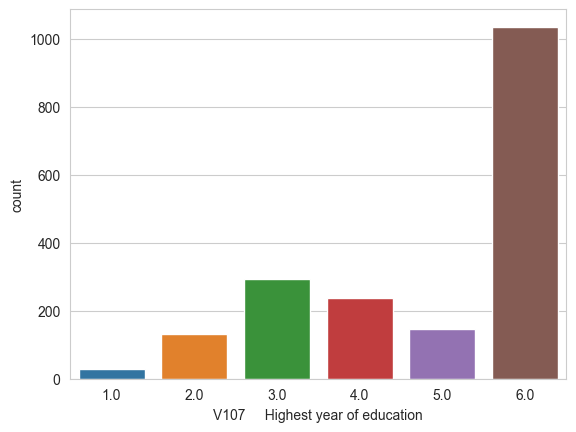

Unique values: [nan  4.  5.  2.  6.  3.  1.]
Number of unique elements: 6
Unique values and their counts:
V107     Highest year of education
6.0    1035
3.0     293
4.0     236
5.0     146
2.0     131
1.0      30
Name: count, dtype: int64
Error in feature:  V107     Highest year of education
Feature Name:  V113     Source of drinking water
Number of Unique Values:  17
Unique values: ['Protected well' 'Unprotected well' 'Tube well or borehole'
 'Sachet water' 'Piped into dwelling' 'Rainwater'
 'River/dam/lake/ponds/stream/canal/irrigation channel'
 'Unprotected spring' 'Not a dejure resident' 'Bottled water'
 'Public tap/standpipe' 'Piped to yard/plot' 'Piped to neighbor'
 'Cart with small tank' 'Tanker truck' 'Protected spring' 'Other']
Number of unique elements: 17
Unique values and their counts:
V113     Source of drinking water
Tube well or borehole                                   3427
Protected well                                          1534
Unprotected well                   

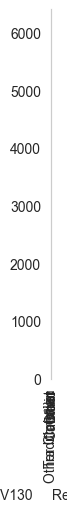

Unique values: ['Catholic' 'Other Christian' 'Islam' 'Traditionalist' 'Other']
Number of unique elements: 5
Unique values and their counts:
V130     Religion
Islam              6099
Other Christian    3419
Catholic            889
Traditionalist       56
Other                 2
Name: count, dtype: int64
Error in feature:  V130     Religion
Feature Name:  V131     Ethnicity
Number of Unique Values:  161
Unique values: ['Tiv' 'Others' 'Igbo/Ibo' 'Idoma' 'Hausa' 'Ukwuani' 'Esan' 'Igede'
 'Yoruba' 'Fulani' 'Igala' 'Kanuri/Beriberi' 'Jaba' 'Ebira/Igbira'
 'Bura/Babur' 'Ibibio' 'Bini/Edo' 'Gbaju/Gbagi' 'Calabar' 'Angas'
 'Mwagavol' 'Nupe' 'Kagoro' 'Berom' 'Ogoja' 'Afemai' 'Uzaurue'
 'Mangus/Manju' 'Bchama' 'Uzeba' 'Egba' 'Jere' 'Ikara' 'Koto' 'Bassa'
 'Kuteb' "Don't Know" 'Arab' 'Zuru' 'Mada' 'Gwandara' 'Foron' 'Karekare'
 'Eggon' 'Kambari' 'Akwai' 'Ankwai' 'Alago' 'Rindre' 'Afo' 'Agatu'
 'Migili' 'Gwari' 'Banguji' 'Bagunge/Badagire' 'Kanawa' 'Shuwa' 'Isoko'
 'Kakanda' 'Gana Gana' 'Kuturm' 'K

/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/statistical_analysis/univariate_analysis.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


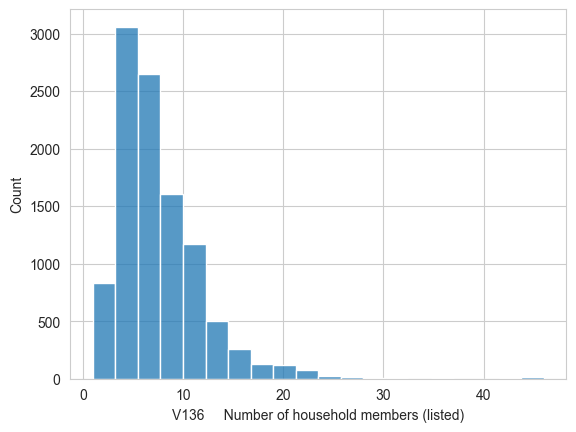

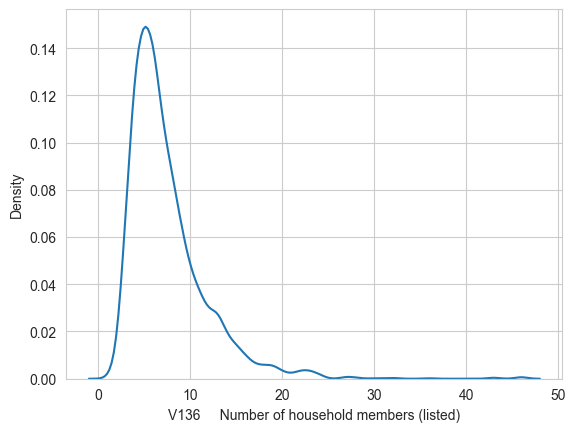

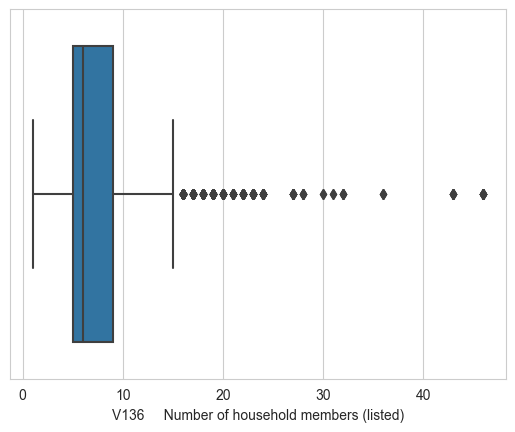

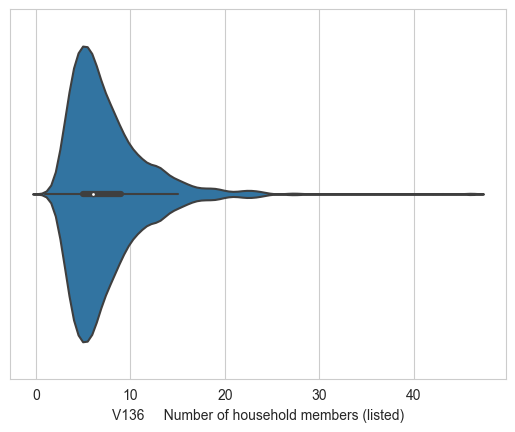

Feature Name:  V137     Number of children 5 and under in household (de jure)
Number of Unique Values:  12
Data set description
DescribeResult(nobs=10465, minmax=(0.0, 14.0), mean=2.3483038700430003, variance=1.8285008021495857, skewness=1.9438485839575597, kurtosis=9.051430537042805)
Central Tendency and Dispersion:  {'Mean': 2.3483038700430003, 'Median': 2.0, 'Mode': 2.0, 'Variance': 1.8283260767982097, 'Standard Deviation': 1.3521560844807117, 'Kurtosis': 9.051430537042805, 'Screw': 1.9438485839575597}
Plotting the count plot


/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/statistical_analysis/univariate_analysis.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


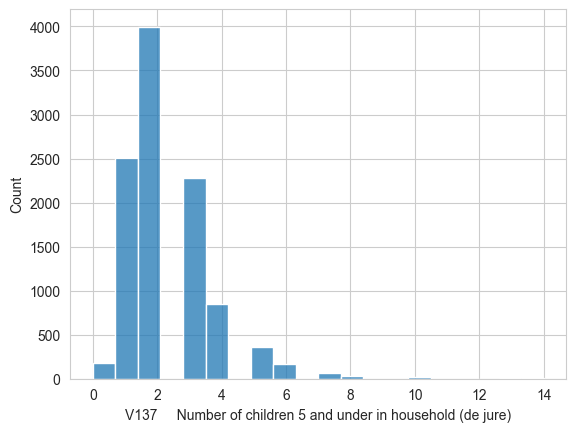

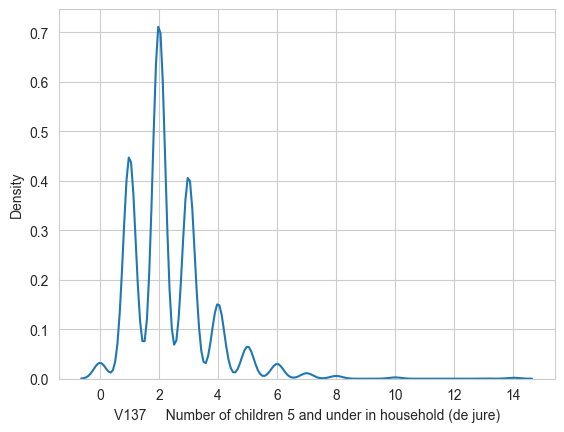

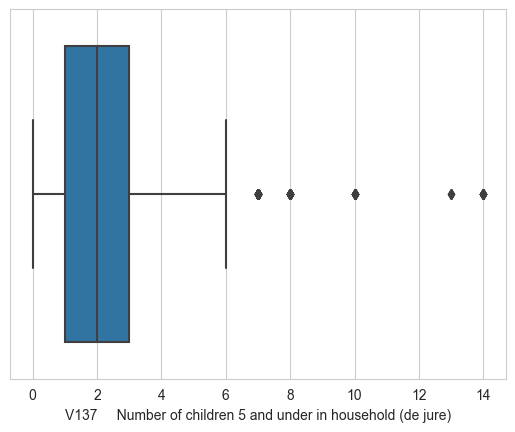

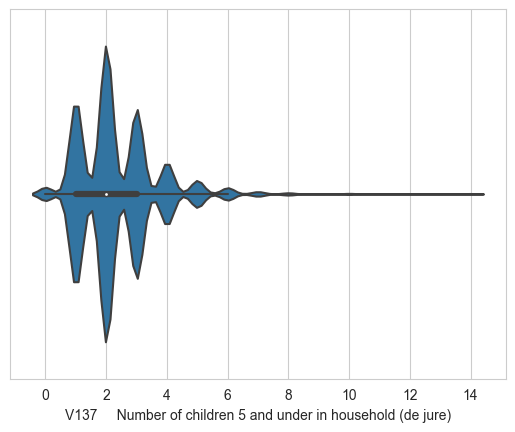

Feature Name:  V149     Educational attainment
Number of Unique Values:  6
Unique Values:  ['Incomplete secondary' 'Complete primary' 'Higher' 'Complete secondary'
 'Incomplete primary' 'No education']
Value Counts:  V149     Educational attainment
No education            4642
Complete secondary      1993
Incomplete secondary    1224
Higher                  1045
Complete primary         971
Incomplete primary       590
Name: count, dtype: int64


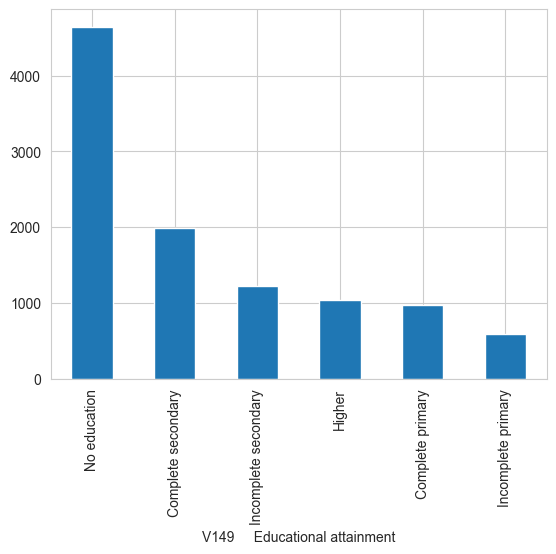

Unique values: ['Incomplete secondary' 'Complete primary' 'Higher' 'Complete secondary'
 'Incomplete primary' 'No education']
Number of unique elements: 6
Unique values and their counts:
V149     Educational attainment
No education            4642
Complete secondary      1993
Incomplete secondary    1224
Higher                  1045
Complete primary         971
Incomplete primary       590
Name: count, dtype: int64
Error in feature:  V149     Educational attainment
Feature Name:  V151     Sex of household head
Number of Unique Values:  2
Unique Values:  ['Male' 'Female']
Value Counts:  V151     Sex of household head
Male      9684
Female     781
Name: count, dtype: int64


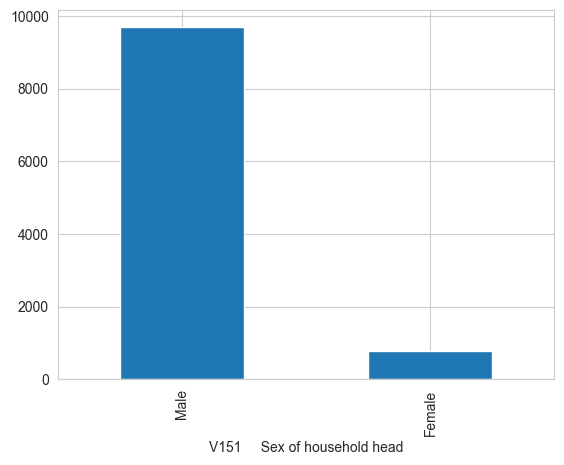

Unique values: ['Male' 'Female']
Number of unique elements: 2
Unique values and their counts:
V151     Sex of household head
Male      9684
Female     781
Name: count, dtype: int64
Error in feature:  V151     Sex of household head
Feature Name:  V152     Age of household head
Number of Unique Values:  75
Unique values: ['50.0' '40.0' '38.0' '41.0' '42.0' '55.0' '21.0' '34.0' '26.0' '33.0'
 '31.0' '22.0' '36.0' '44.0' '43.0' '37.0' '53.0' '35.0' '49.0' '46.0'
 '68.0' '62.0' '32.0' '39.0' '29.0' '47.0' '57.0' '27.0' '28.0' '25.0'
 '30.0' '20.0' '52.0' '64.0' '67.0' '45.0' '80.0' '54.0' '60.0' '48.0'
 '23.0' '65.0' '70.0' '24.0' '19.0' '59.0' '61.0' '74.0' '51.0' '56.0'
 "Don't know" '73.0' '58.0' '77.0' '75.0' '18.0' '88.0' '79.0' '85.0'
 '69.0' '17.0' '82.0' '63.0' '81.0' '78.0' '71.0' '76.0' '90.0' '66.0'
 '95.0' '72.0' '83.0' '89.0' '86.0' '87.0']
Number of unique elements: 75
Unique values and their counts:
V152     Age of household head
40.0    1189
35.0     941
30.0     889
45.0   

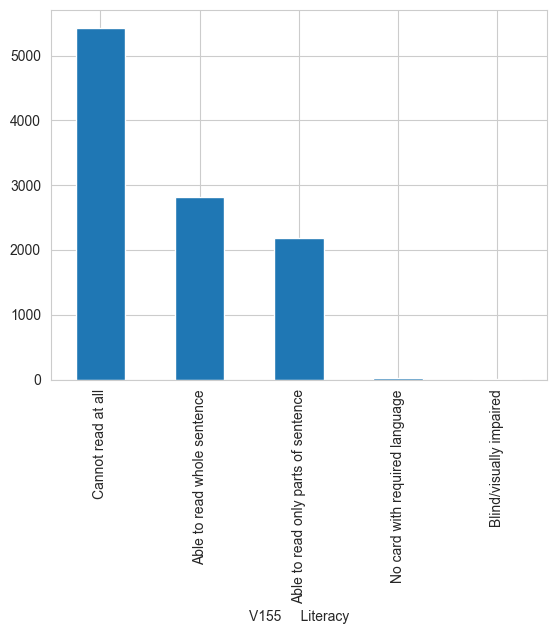

Unique values: ['Able to read only parts of sentence' 'Able to read whole sentence'
 'Cannot read at all' 'No card with required language'
 'Blind/visually impaired']
Number of unique elements: 5
Unique values and their counts:
V155     Literacy
Cannot read at all                     5432
Able to read whole sentence            2818
Able to read only parts of sentence    2190
No card with required language           19
Blind/visually impaired                   6
Name: count, dtype: int64
Error in feature:  V155     Literacy
Feature Name:  V190     Wealth index combined
Number of Unique Values:  5
Unique Values:  ['Richer' 'Middle' 'Poorer' 'Richest' 'Poorest']
Value Counts:  V190     Wealth index combined
Poorest    2211
Middle     2195
Poorer     2177
Richer     2044
Richest    1838
Name: count, dtype: int64


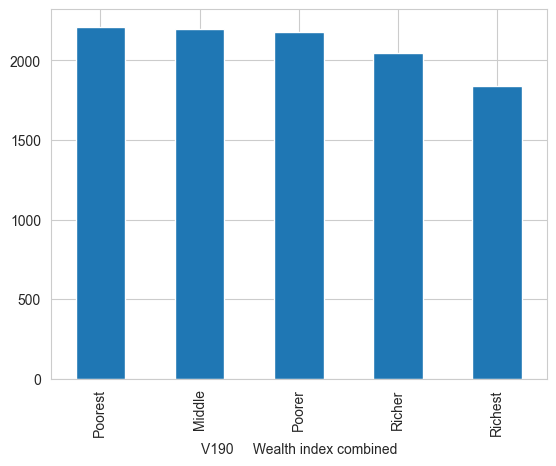

Unique values: ['Richer' 'Middle' 'Poorer' 'Richest' 'Poorest']
Number of unique elements: 5
Unique values and their counts:
V190     Wealth index combined
Poorest    2211
Middle     2195
Poorer     2177
Richer     2044
Richest    1838
Name: count, dtype: int64
Error in feature:  V190     Wealth index combined
Feature Name:  V190A    Wealth index for urbanrural
Number of Unique Values:  5
Unique Values:  ['Poorer' 'Middle' 'Poorest' 'Richest' 'Richer']
Value Counts:  V190A    Wealth index for urbanrural
Richer     2169
Poorer     2163
Poorest    2149
Middle     2144
Richest    1840
Name: count, dtype: int64


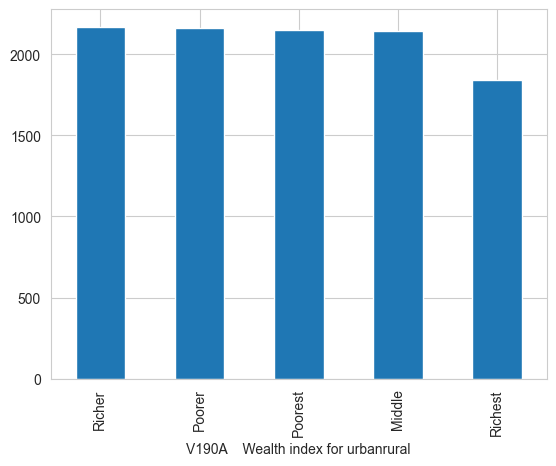

Unique values: ['Poorer' 'Middle' 'Poorest' 'Richest' 'Richer']
Number of unique elements: 5
Unique values and their counts:
V190A    Wealth index for urbanrural
Richer     2169
Poorer     2163
Poorest    2149
Middle     2144
Richest    1840
Name: count, dtype: int64
Error in feature:  V190A    Wealth index for urbanrural
Feature Name:  ML101    Type of mosquito bed net(s) slept under last night
Number of Unique Values:  3
Unique Values:  ['No net' 'Only treated nets' 'Only untreated nets']
Value Counts:  ML101    Type of mosquito bed net(s) slept under last night
No net                 5622
Only treated nets      4688
Only untreated nets     155
Name: count, dtype: int64


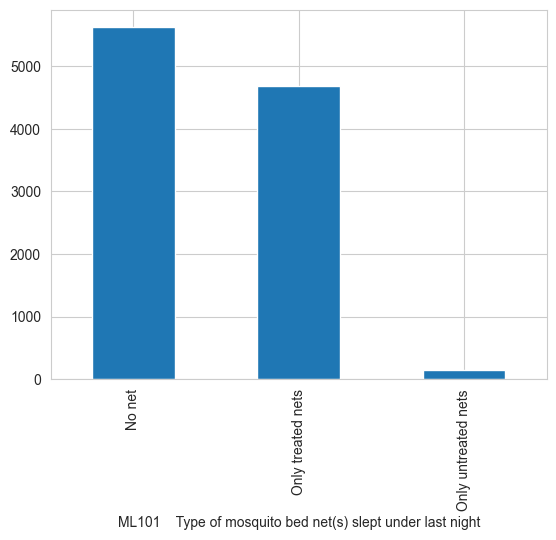

Unique values: ['No net' 'Only treated nets' 'Only untreated nets']
Number of unique elements: 3
Unique values and their counts:
ML101    Type of mosquito bed net(s) slept under last night
No net                 5622
Only treated nets      4688
Only untreated nets     155
Name: count, dtype: int64
Error in feature:  ML101    Type of mosquito bed net(s) slept under last night
Feature Name:  V459     Have mosquito bed net for sleeping (from household questionnaire)
Number of Unique Values:  2
Unique Values:  ['No' 'Yes']
Value Counts:  V459     Have mosquito bed net for sleeping (from household questionnaire)
Yes    6746
No     3719
Name: count, dtype: int64


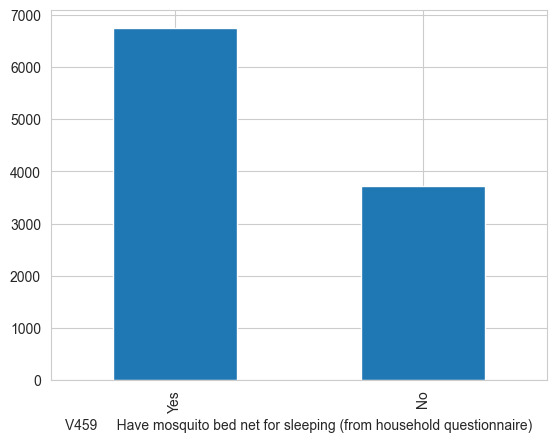

Unique values: ['No' 'Yes']
Number of unique elements: 2
Unique values and their counts:
V459     Have mosquito bed net for sleeping (from household questionnaire)
Yes    6746
No     3719
Name: count, dtype: int64
Error in feature:  V459     Have mosquito bed net for sleeping (from household questionnaire)
Feature Name:  V460     Children under 5 slept under mosquito bed net last night (household questionnaire)
Number of Unique Values:  4
Unique Values:  ['No net in household' 'No' 'All children' 'Some children' nan]
Value Counts:  V460     Children under 5 slept under mosquito bed net last night (household questionnaire)
No net in household    3641
All children           3623
No                     1563
Some children          1449
Name: count, dtype: int64


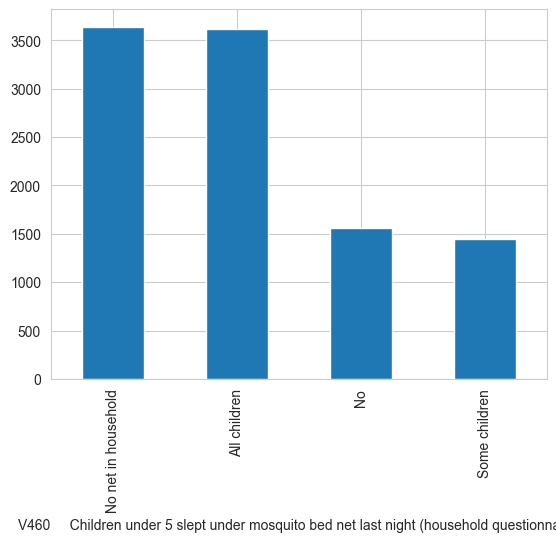

Unique values: ['No net in household' 'No' 'All children' 'Some children' nan]
Number of unique elements: 4
Unique values and their counts:
V460     Children under 5 slept under mosquito bed net last night (household questionnaire)
No net in household    3641
All children           3623
No                     1563
Some children          1449
Name: count, dtype: int64
Error in feature:  V460     Children under 5 slept under mosquito bed net last night (household questionnaire)
Feature Name:  BORD     Birth order number
Number of Unique Values:  18
Data set description
DescribeResult(nobs=10465, minmax=(1.0, 18.0), mean=3.7767797419971334, variance=6.505022694696607, skewness=1.1600519312747213, kurtosis=1.282786241012798)
Central Tendency and Dispersion:  {'Mean': 3.7767797419971334, 'Median': 3.0, 'Mode': 1.0, 'Variance': 6.504401096732471, 'Standard Deviation': 2.5503727368234768, 'Kurtosis': 1.282786241012798, 'Screw': 1.1600519312747213}
Plotting the count plot


/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/statistical_analysis/univariate_analysis.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


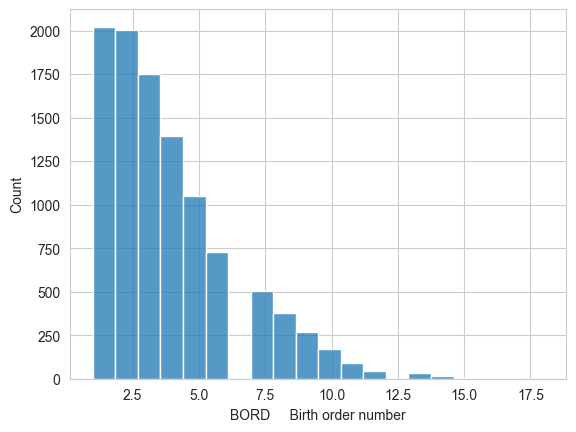

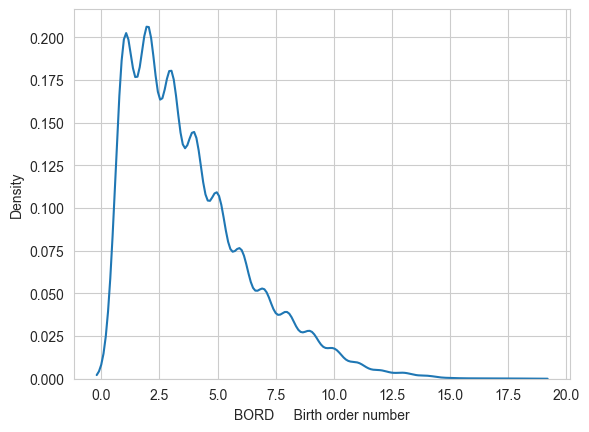

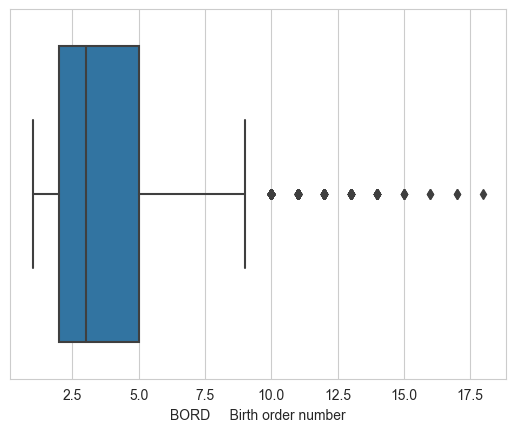

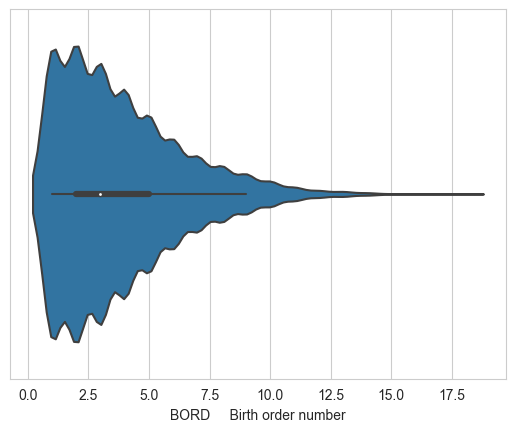

Feature Name:  B1       Month of birth
Number of Unique Values:  12
Data set description
DescribeResult(nobs=10465, minmax=(1.0, 12.0), mean=6.415384615384616, variance=10.48196894848271, skewness=0.00831517462159744, kurtosis=-1.1066353133538696)
Central Tendency and Dispersion:  {'Mean': 6.415384615384616, 'Median': 6.0, 'Mode': 10.0, 'Variance': 10.480967326987393, 'Standard Deviation': 3.2374322119524592, 'Kurtosis': -1.1066353133538696, 'Screw': 0.00831517462159744}
Plotting the count plot


/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/statistical_analysis/univariate_analysis.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


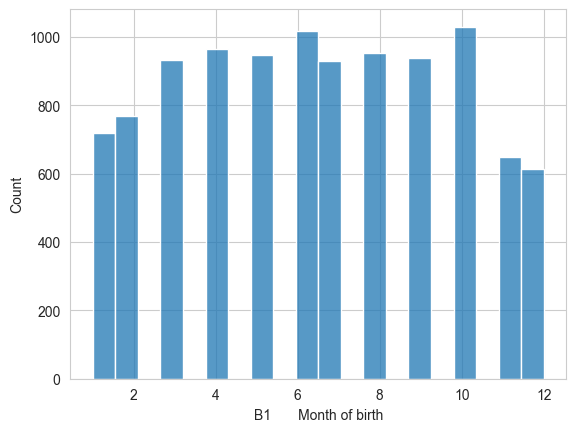

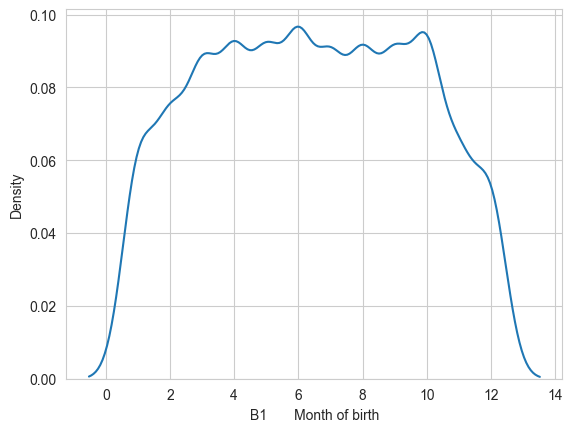

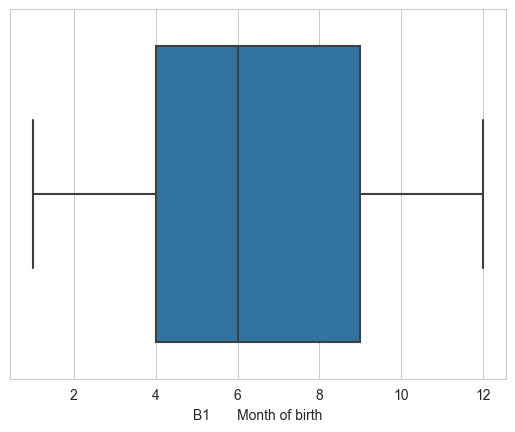

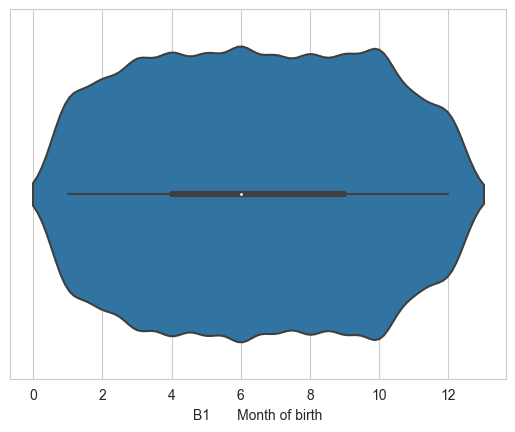

Feature Name:  B4       Sex of child
Number of Unique Values:  2
Unique Values:  ['Male' 'Female']
Value Counts:  B4       Sex of child
Male      5371
Female    5094
Name: count, dtype: int64


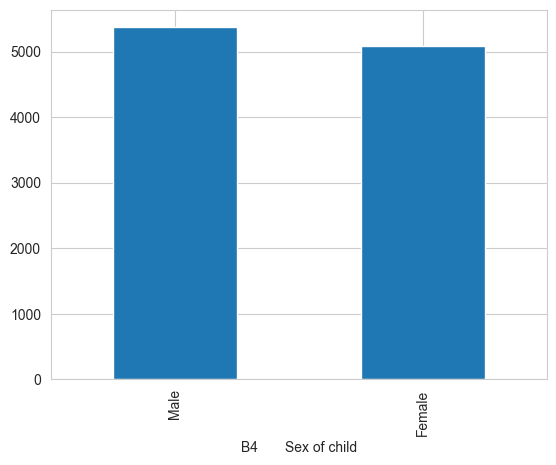

Unique values: ['Male' 'Female']
Number of unique elements: 2
Unique values and their counts:
B4       Sex of child
Male      5371
Female    5094
Name: count, dtype: int64
Error in feature:  B4       Sex of child
Feature Name:  B8       Current age of child
Number of Unique Values:  5
Unique Values:  [ 3.  1.  0.  2.  4. nan]
Value Counts:  B8       Current age of child
4.0    2355
3.0    2042
2.0    1982
1.0    1902
0.0    1853
Name: count, dtype: int64


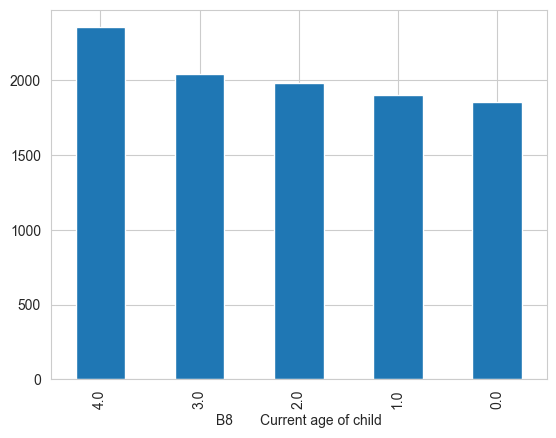

Data set description
DescribeResult(nobs=10465, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
Central Tendency and Dispersion:  {'Mean': 2.1128873100453918, 'Median': 2.0, 'Mode': 4.0, 'Variance': nan, 'Standard Deviation': nan, 'Kurtosis': nan, 'Screw': nan}
Plotting the count plot


/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/statistical_analysis/univariate_analysis.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


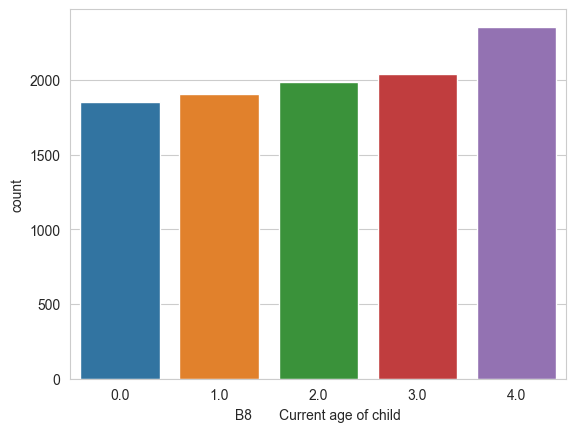

Unique values: [ 3.  1.  0.  2.  4. nan]
Number of unique elements: 5
Unique values and their counts:
B8       Current age of child
4.0    2355
3.0    2042
2.0    1982
1.0    1902
0.0    1853
Name: count, dtype: int64
Error in feature:  B8       Current age of child
Feature Name:  V218     Number of living children
Number of Unique Values:  17
Data set description
DescribeResult(nobs=10465, minmax=(0.0, 16.0), mean=3.721834687052078, variance=4.578293269687365, skewness=0.9149933105356602, kurtosis=0.8118393395401537)
Central Tendency and Dispersion:  {'Mean': 3.721834687052078, 'Median': 3.0, 'Mode': 2.0, 'Variance': 4.577855783469526, 'Standard Deviation': 2.1395924339624885, 'Kurtosis': 0.8118393395401537, 'Screw': 0.9149933105356602}
Plotting the count plot


/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/statistical_analysis/univariate_analysis.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


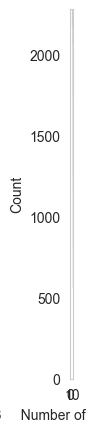

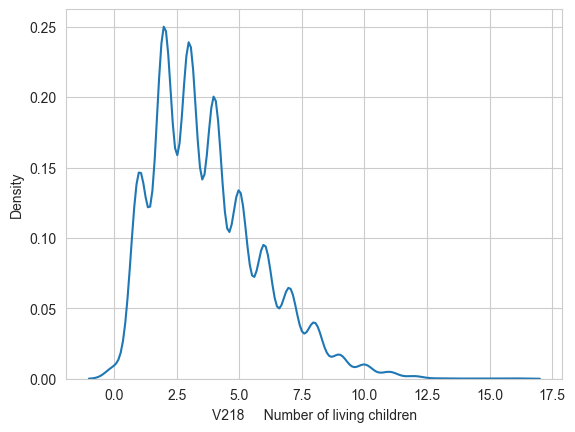

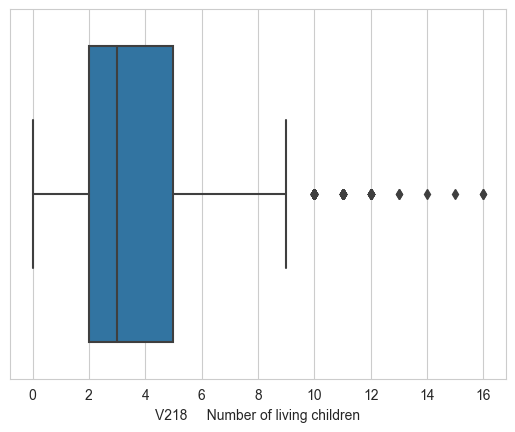

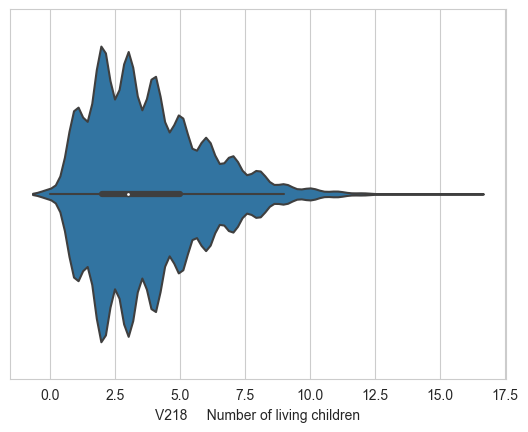

Feature Name:  M14      Number of antenatal visits during pregnancy
Number of Unique Values:  22
Unique values: [nan '6.0' 'No antenatal visits' '5.0' '3.0' '4.0' '7.0' '10.0' '1.0'
 '8.0' '2.0' "Don't know" '17.0' '20.0' '12.0' '14.0' '9.0' '13.0' '15.0'
 '11.0' '16.0' '18.0' '19.0']
Number of unique elements: 22
Unique values and their counts:
M14      Number of antenatal visits during pregnancy
No antenatal visits    1263
4.0                     788
5.0                     584
3.0                     561
6.0                     487
2.0                     269
Don't know              244
7.0                     198
8.0                     197
1.0                     180
10.0                    163
20.0                     70
9.0                      55
12.0                     46
15.0                     38
14.0                     23
11.0                     22
16.0                     19
18.0                      9
17.0                      6
13.0                      4
19.0       

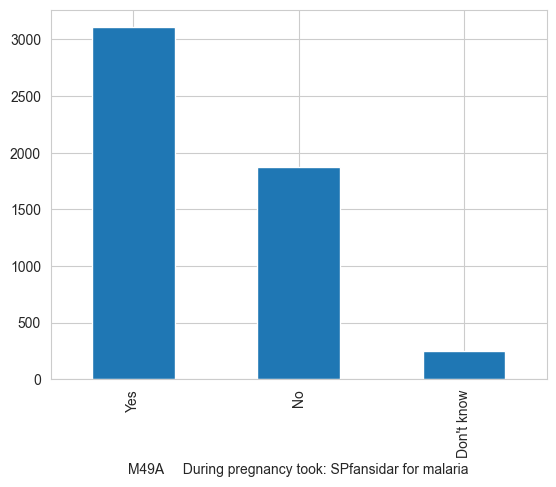

Unique values: [nan 'Yes' 'No' "Don't know"]
Number of unique elements: 3
Unique values and their counts:
M49A     During pregnancy took: SPfansidar for malaria
Yes           3107
No            1875
Don't know     248
Name: count, dtype: int64
Error in feature:  M49A     During pregnancy took: SPfansidar for malaria
Feature Name:  ML1      Number of times took fansidar during pregnancy
Number of Unique Values:  15
Data set description
DescribeResult(nobs=10465, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
Central Tendency and Dispersion:  {'Mean': 2.6762149983907304, 'Median': 3.0, 'Mode': nan, 'Variance': nan, 'Standard Deviation': nan, 'Kurtosis': nan, 'Screw': nan}
Plotting the count plot


/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/statistical_analysis/univariate_analysis.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


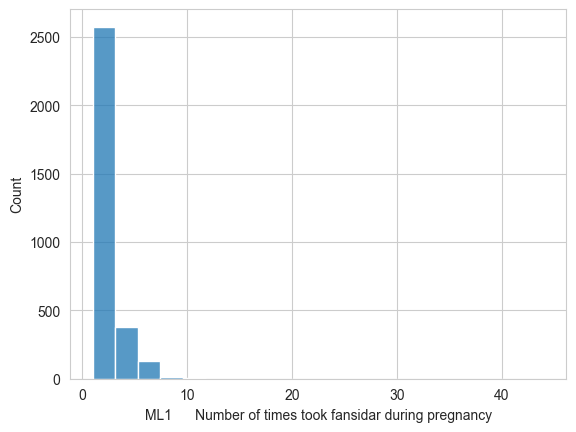

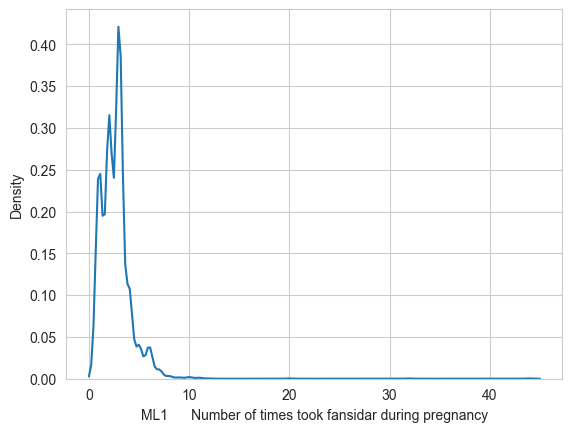

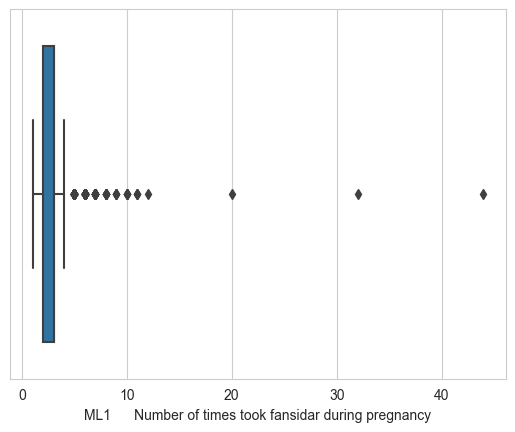

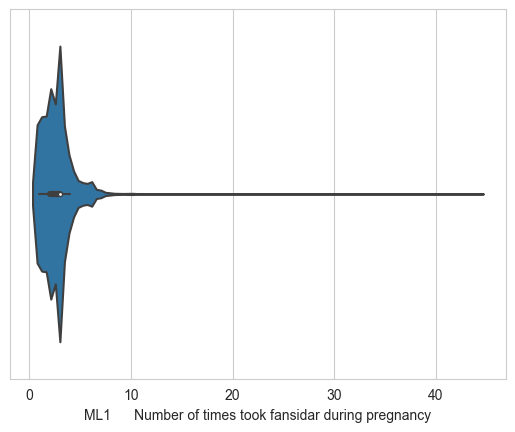

Feature Name:  ML0      Type of mosquito bed net(s) child slept under last night
Number of Unique Values:  3
Unique Values:  ['No net' 'Only treated nets' nan 'Only untreated nets']
Value Counts:  ML0      Type of mosquito bed net(s) child slept under last night
No net                 5708
Only treated nets      4131
Only untreated nets     126
Name: count, dtype: int64


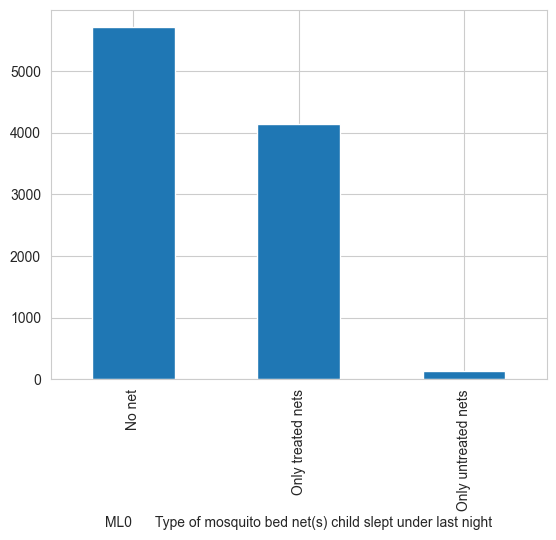

Unique values: ['No net' 'Only treated nets' nan 'Only untreated nets']
Number of unique elements: 3
Unique values and their counts:
ML0      Type of mosquito bed net(s) child slept under last night
No net                 5708
Only treated nets      4131
Only untreated nets     126
Name: count, dtype: int64
Error in feature:  ML0      Type of mosquito bed net(s) child slept under last night
Feature Name:  SLGA     Local government area
Number of Unique Values:  428
Data set description
DescribeResult(nobs=10465, minmax=(4.0, 772.0), mean=332.755088389871, variance=47967.76522281567, skewness=0.3847506940397822, kurtosis=-1.0014949032254312)
Central Tendency and Dispersion:  {'Mean': 332.755088389871, 'Median': 306.0, 'Mode': 309.0, 'Variance': 47963.18158543175, 'Standard Deviation': 219.0049807320184, 'Kurtosis': -1.0014949032254312, 'Screw': 0.3847506940397822}
Plotting the count plot


/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/statistical_analysis/univariate_analysis.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


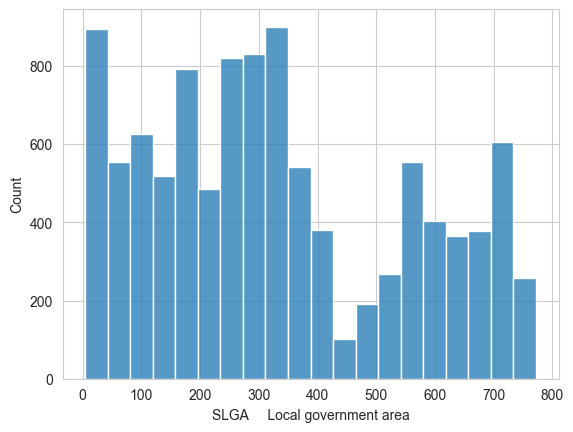

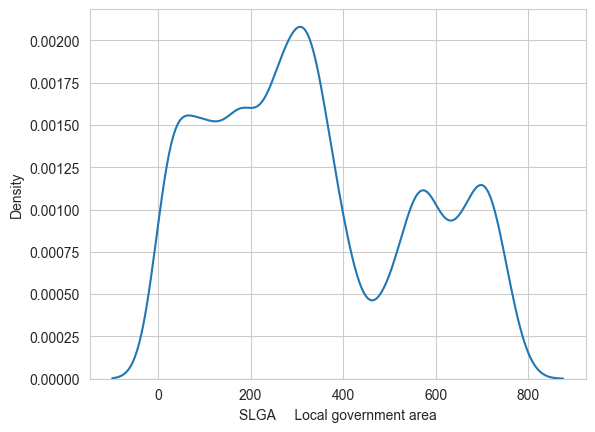

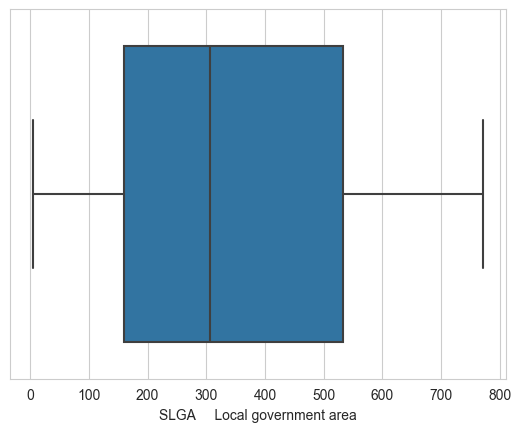

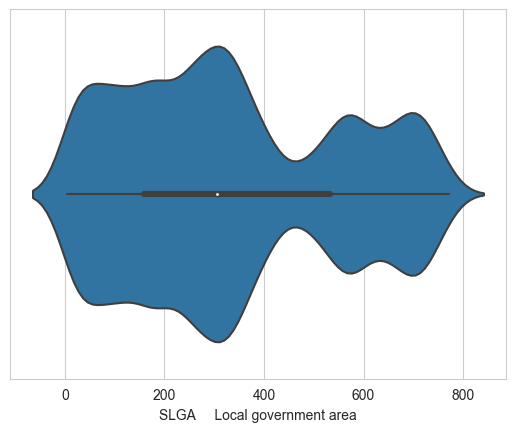

Feature Name:  B19      Current age of child in months (months since birth for dead children)
Number of Unique Values:  60
Data set description
DescribeResult(nobs=10465, minmax=(0.0, 59.0), mean=30.395891065456283, variance=303.93662302330034, skewness=-0.05941401375656098, kurtosis=-1.2170544159478407)
Central Tendency and Dispersion:  {'Mean': 30.395891065456283, 'Median': 30.0, 'Mode': 53.0, 'Variance': 303.90757986773195, 'Standard Deviation': 17.43294524363947, 'Kurtosis': -1.2170544159478407, 'Screw': -0.05941401375656098}
Plotting the count plot


/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/statistical_analysis/univariate_analysis.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


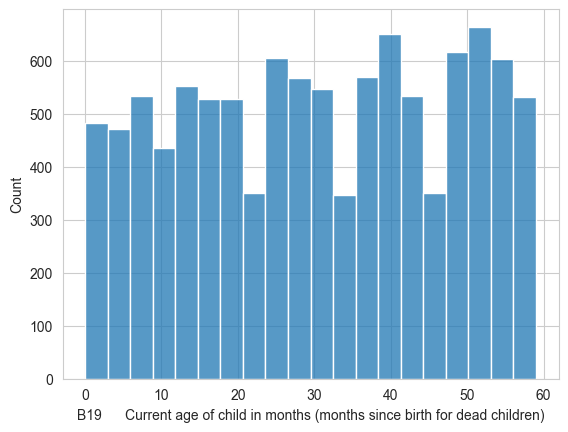

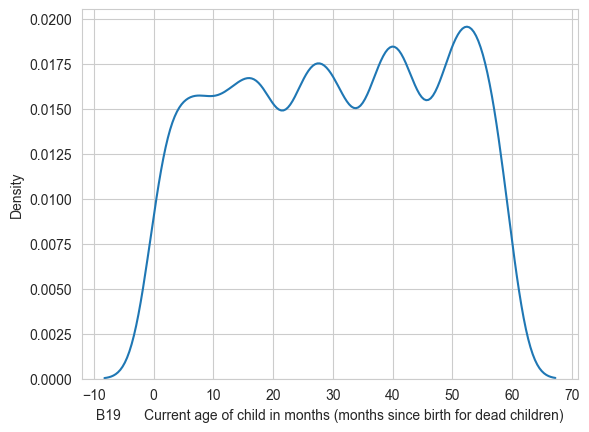

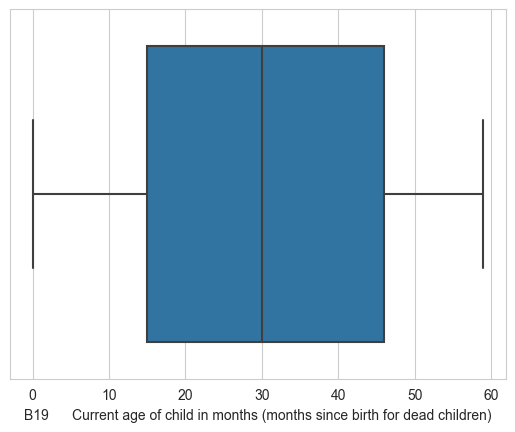

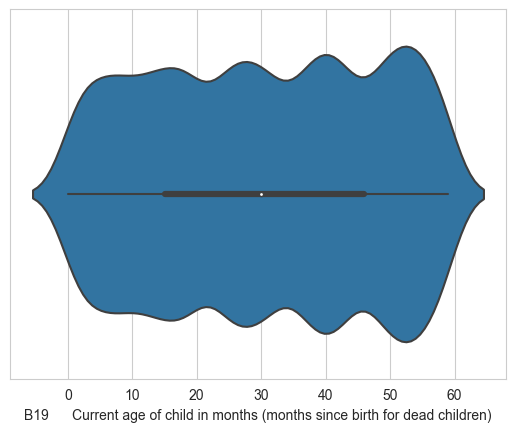

Feature Name:  HW1      Child's age in months
Number of Unique Values:  60
Data set description
DescribeResult(nobs=10465, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
Central Tendency and Dispersion:  {'Mean': 30.38416540595058, 'Median': 30.0, 'Mode': nan, 'Variance': nan, 'Standard Deviation': nan, 'Kurtosis': nan, 'Screw': nan}
Plotting the count plot


/Users/saheedfaremi/Library/CloudStorage/OneDrive-Etihuku/malariaDemographic/statistical_analysis/univariate_analysis.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


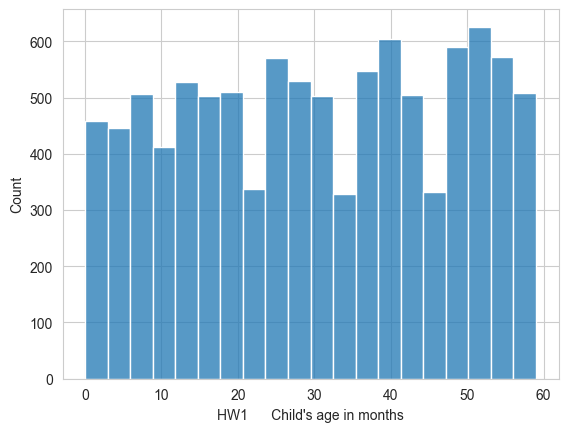

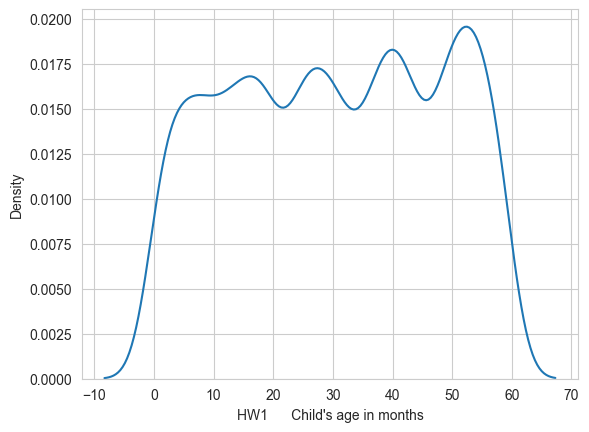

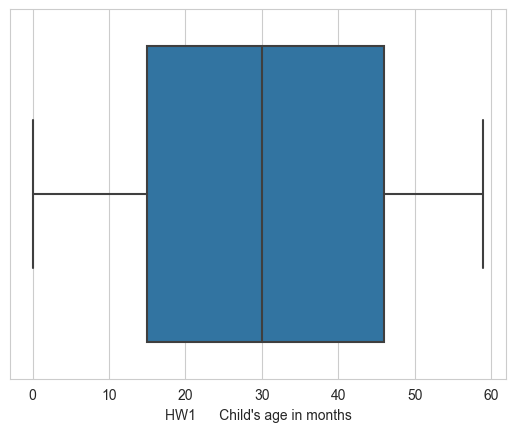

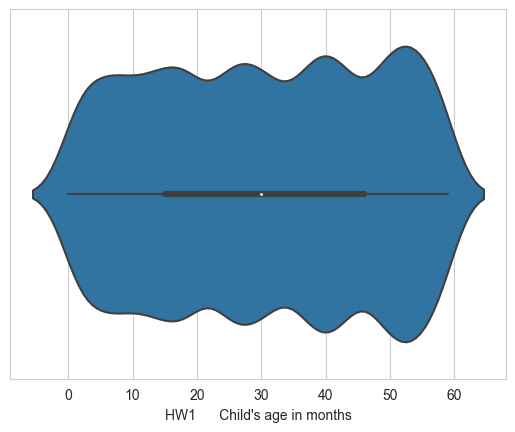

Feature Name:  SREGION  Region
Number of Unique Values:  6
Unique Values:  ['North Central' 'North East' 'North West' 'South East' 'South South'
 'South West']
Value Counts:  SREGION  Region
North West       3206
North Central    2062
North East       2052
South South      1336
South East       1154
South West        655
Name: count, dtype: int64


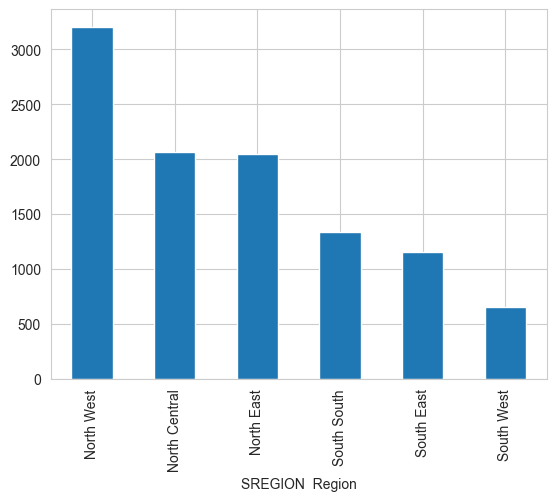

Unique values: ['North Central' 'North East' 'North West' 'South East' 'South South'
 'South West']
Number of unique elements: 6
Unique values and their counts:
SREGION  Region
North West       3206
North Central    2062
North East       2052
South South      1336
South East       1154
South West        655
Name: count, dtype: int64
Error in feature:  SREGION  Region
Feature Name:  SBONNY   Bonny State
Number of Unique Values:  2
Unique Values:  ['No' 'Yes']
Value Counts:  SBONNY   Bonny State
No     10392
Yes       73
Name: count, dtype: int64


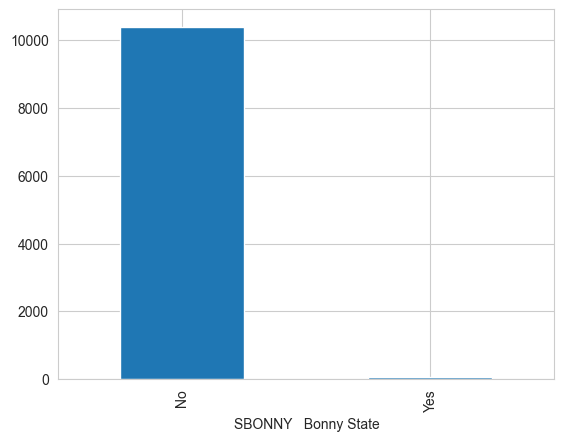

Unique values: ['No' 'Yes']
Number of unique elements: 2
Unique values and their counts:
SBONNY   Bonny State
No     10392
Yes       73
Name: count, dtype: int64
Error in feature:  SBONNY   Bonny State
Feature Name:  HML32$01 Final result of malaria from blood smear test
Number of Unique Values:  2
Unique Values:  ['Negative' 'Positive']
Value Counts:  HML32$01 Final result of malaria from blood smear test
Negative    8242
Positive    2223
Name: count, dtype: int64


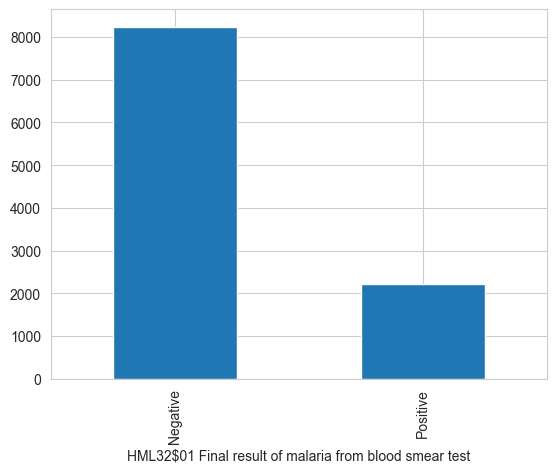

Unique values: ['Negative' 'Positive']
Number of unique elements: 2
Unique values and their counts:
HML32$01 Final result of malaria from blood smear test
Negative    8242
Positive    2223
Name: count, dtype: int64
Error in feature:  HML32$01 Final result of malaria from blood smear test


In [15]:
for col in children_under_5.columns:
 feature_uni_varaite_analysis(col, children_under_5, not(col == 'HV220    Age of head of household'))

## Multivariate

Bi variate Analysis of X =  V024     Region and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


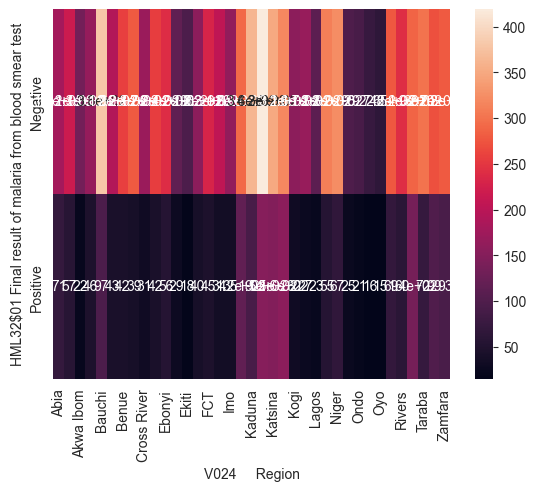

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V024     Region                                                           
Abia                                                         180        71
Adamawa                                                      218        57
Akwa Ibom                                                    134        22
Anambra                                                      166        46
Bauchi                                                       381        97
Bayelsa                                                      192        43
Benue                                                        257        42
Borno                                                        279        39
Cross River                                                  171        31
Delta                                                        255        42
Ebonyi                                                       240        56
Edo                      

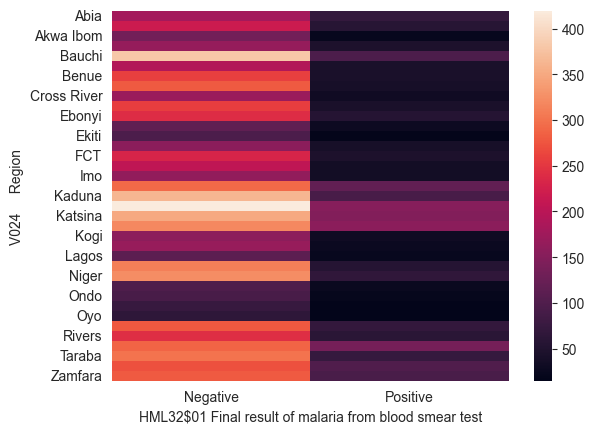

Bi variate Analysis of X =  V025     Type of place of residence and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


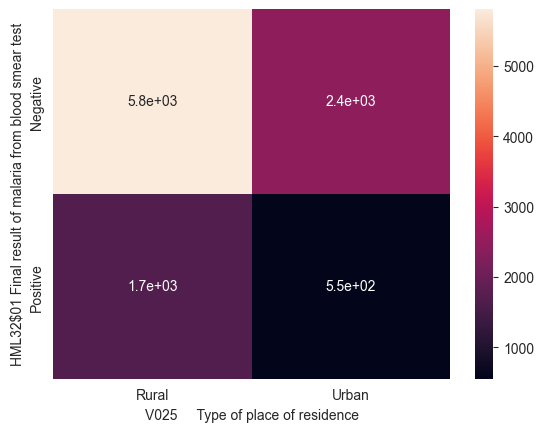

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V025     Type of place of residence                                       
Rural                                                       5806      1669
Urban                                                       2436       554


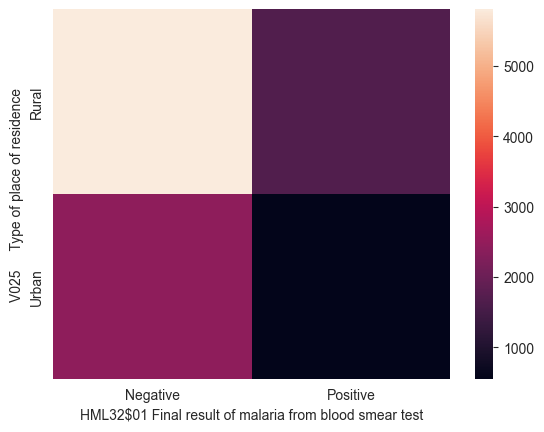

Bi variate Analysis of X =  V101     Region and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


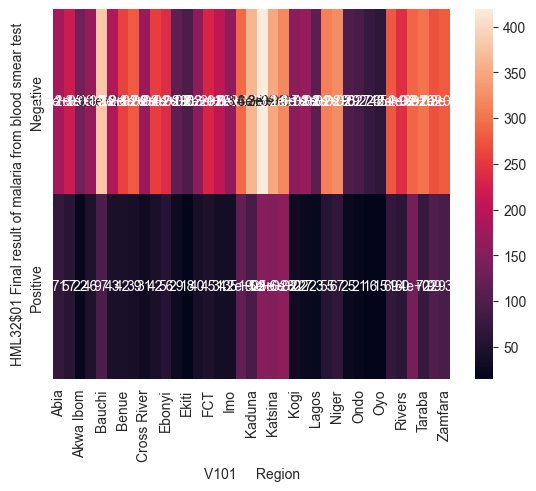

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V101     Region                                                           
Abia                                                         180        71
Adamawa                                                      218        57
Akwa Ibom                                                    134        22
Anambra                                                      166        46
Bauchi                                                       381        97
Bayelsa                                                      192        43
Benue                                                        257        42
Borno                                                        279        39
Cross River                                                  171        31
Delta                                                        255        42
Ebonyi                                                       240        56
Edo                      

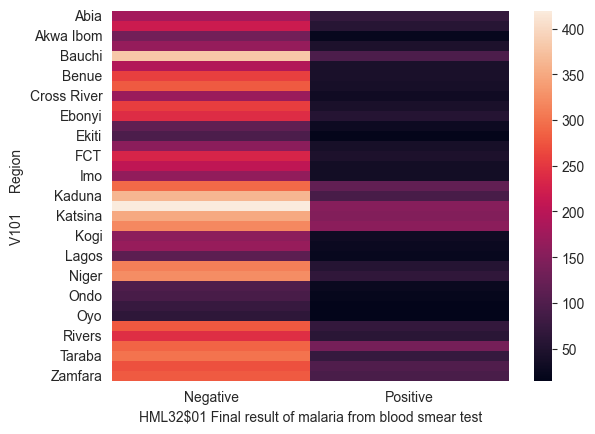

Bi variate Analysis of X =  V102     Type of place of residence and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


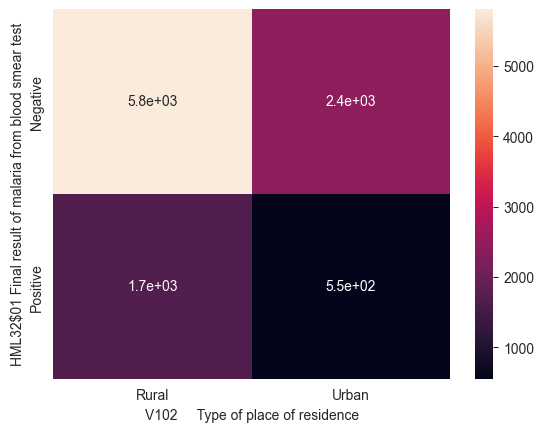

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V102     Type of place of residence                                       
Rural                                                       5806      1669
Urban                                                       2436       554


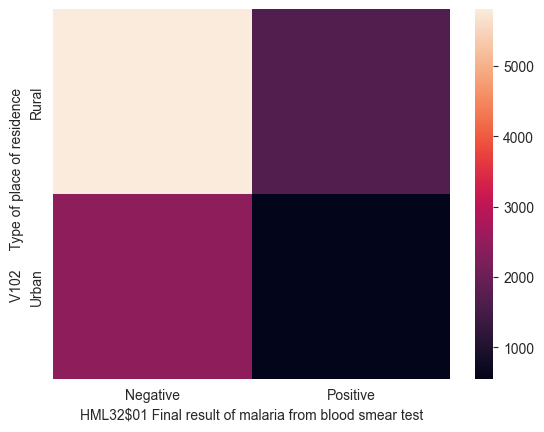

Bi variate Analysis of X =  V106     Highest educational level and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


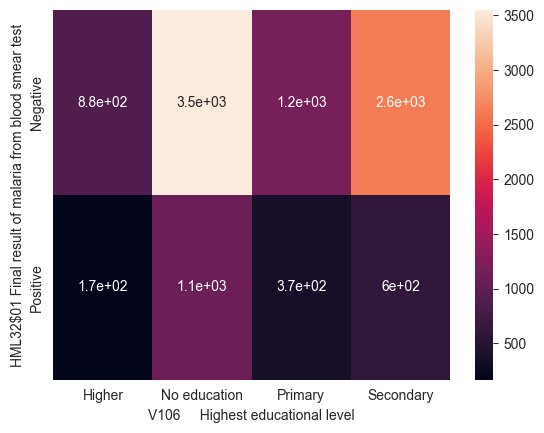

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V106     Highest educational level                                        
Higher                                                       879       166
No education                                                3549      1093
Primary                                                     1195       366
Secondary                                                   2619       598


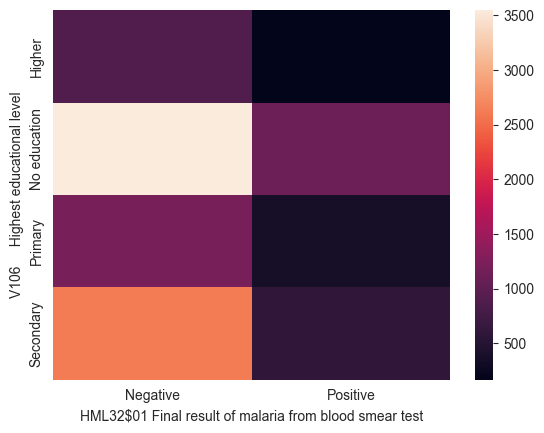

Bi variate Analysis of X =  V107     Highest year of education and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is float64


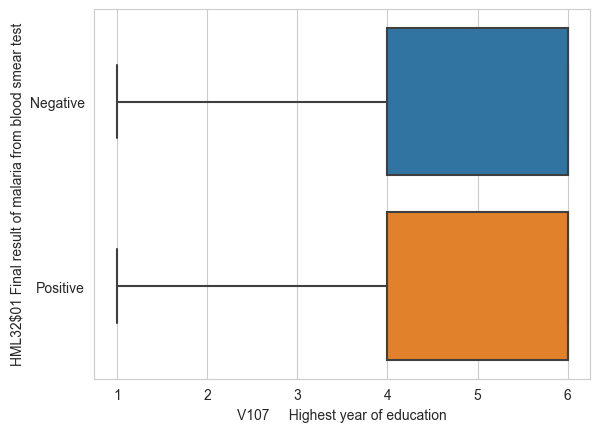

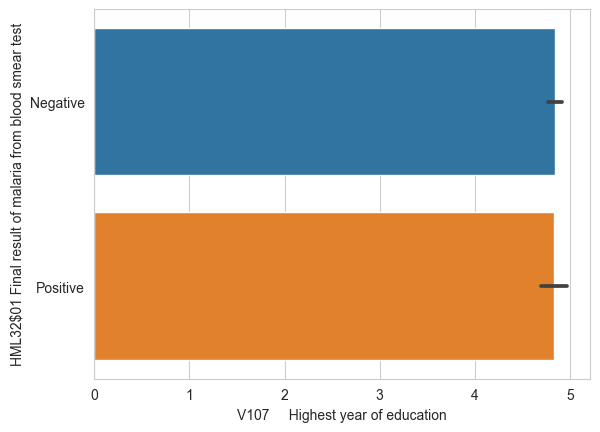

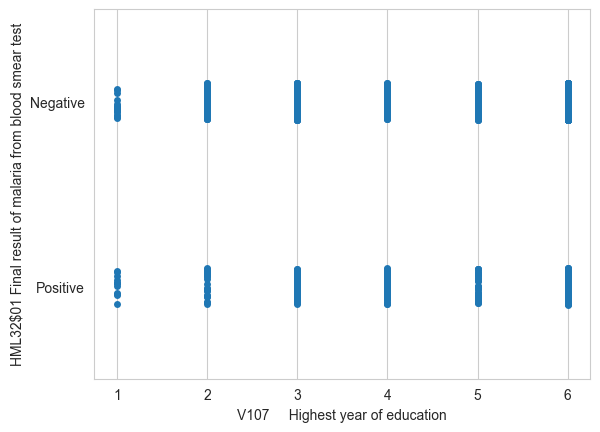

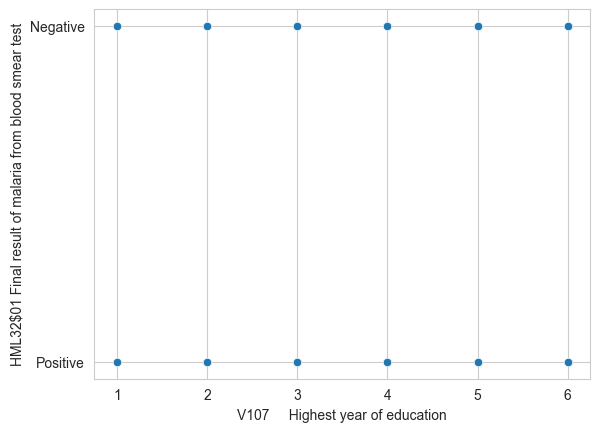

Bi variate Analysis of X =  V113     Source of drinking water and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


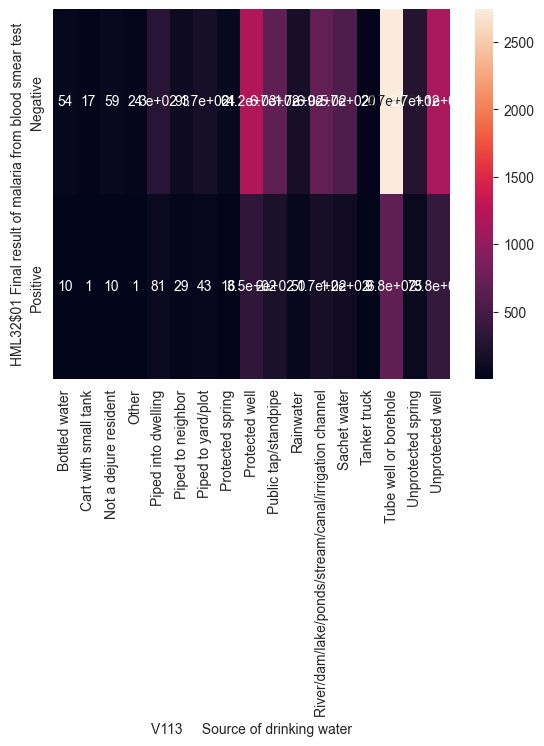

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V113     Source of drinking water                                         
Bottled water                                                 54        10
Cart with small tank                                          17         1
Not a dejure resident                                         59        10
Other                                                         24         1
Piped into dwelling                                          301        81
Piped to neighbor                                             93        29
Piped to yard/plot                                           169        43
Protected spring                                              64        16
Protected well                                              1187       347
Public tap/standpipe                                         674       197
Rainwater                                                    170        50
River/dam/lake/ponds/stre

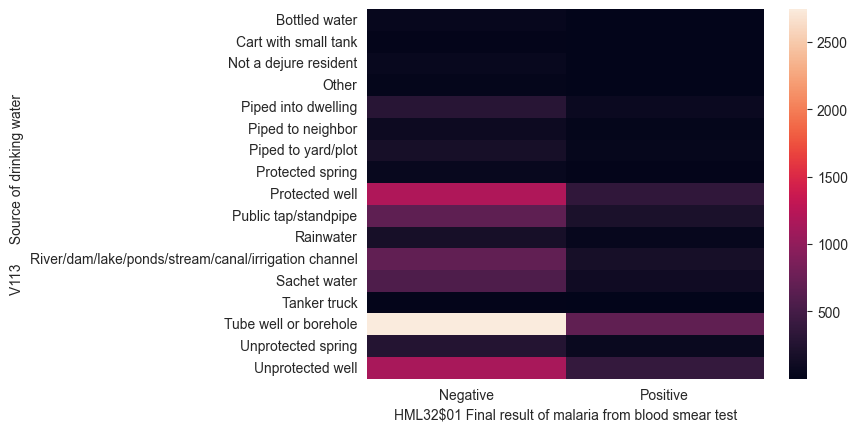

Bi variate Analysis of X =  V130     Religion and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


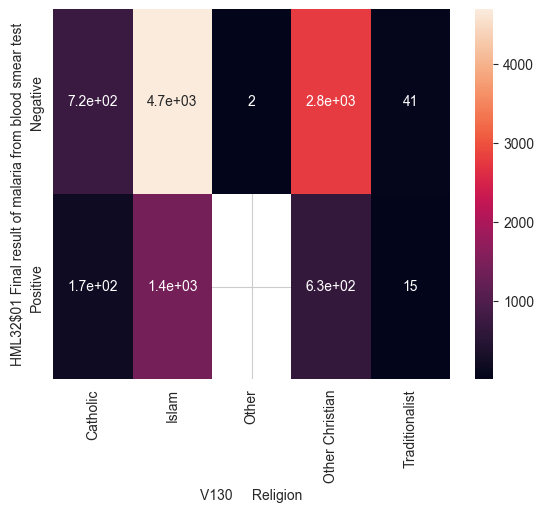

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V130     Religion                                                         
Catholic                                                     718       171
Islam                                                       4696      1403
Other                                                          2         0
Other Christian                                             2785       634
Traditionalist                                                41        15


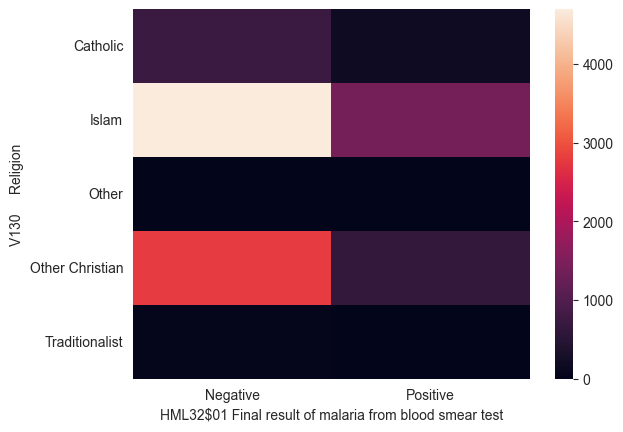

Bi variate Analysis of X =  V131     Ethnicity and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


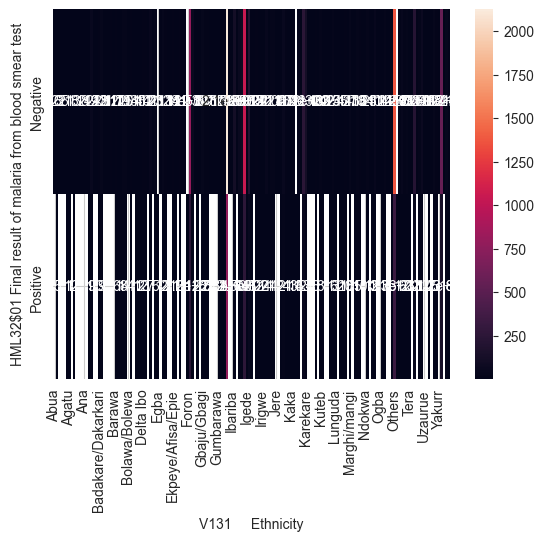

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V131     Ethnicity                                                        
Abua                                                           2         0
Adra/Adarawa                                                   6         5
Adun                                                           3         0
Afemai                                                         2         0
Afizire                                                        5         0
...                                                          ...       ...
Yakurr                                                         2         0
Yoruba                                                       558       122
Yungur                                                         2         0
Zabarmawa                                                     41        18
Zuru                                                          14         8

[161 rows x 2 columns]


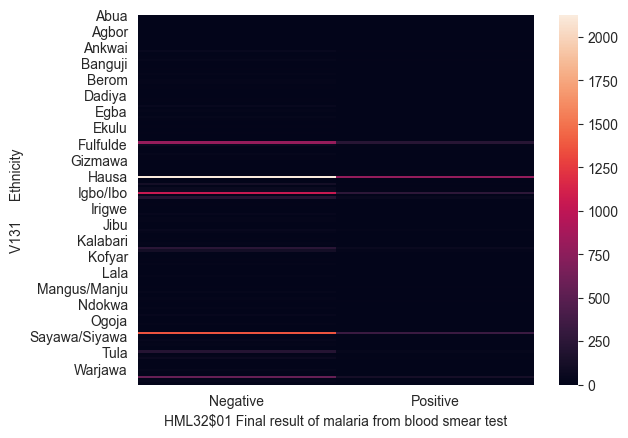

Bi variate Analysis of X =  V136     Number of household members (listed) and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is float64


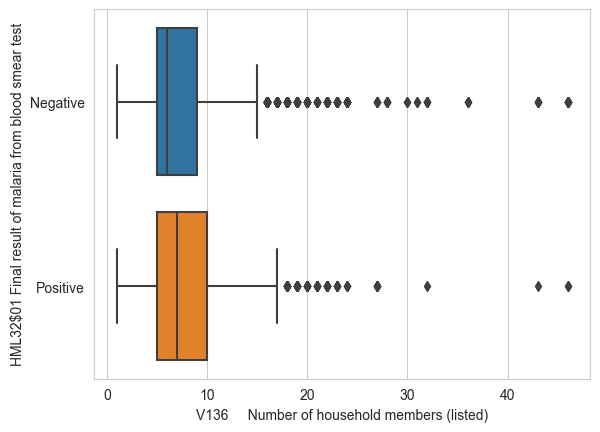

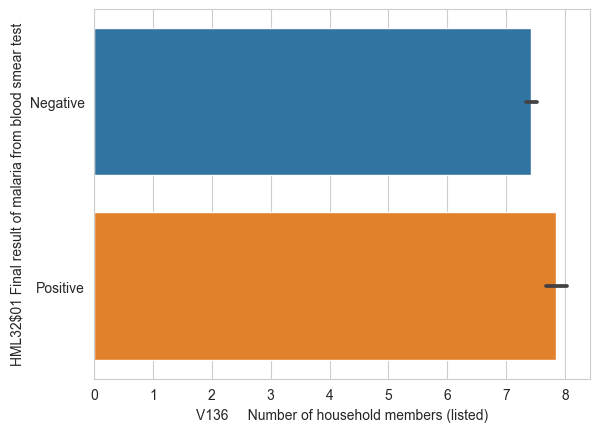

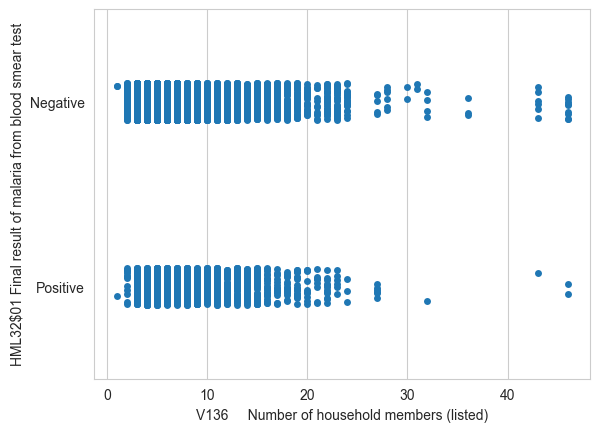

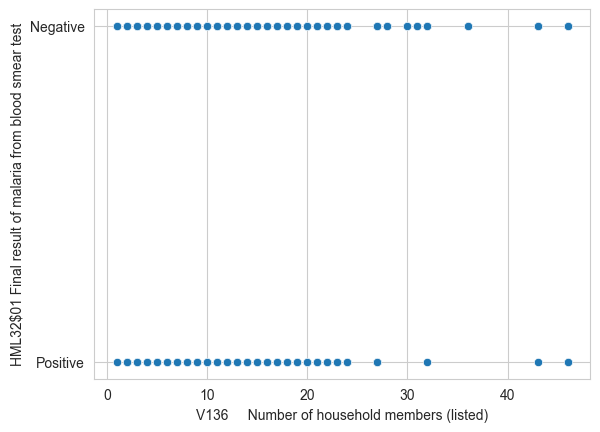

Bi variate Analysis of X =  V137     Number of children 5 and under in household (de jure) and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is float64


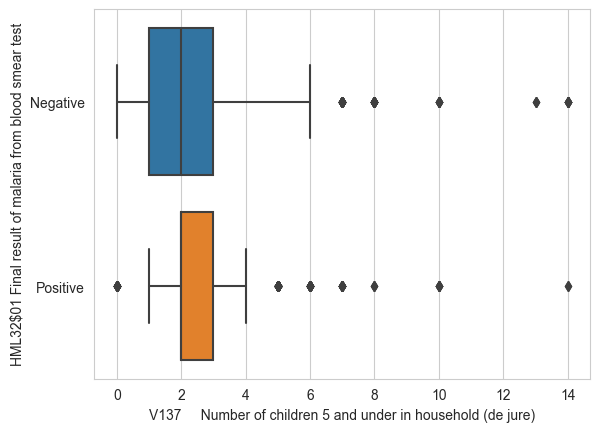

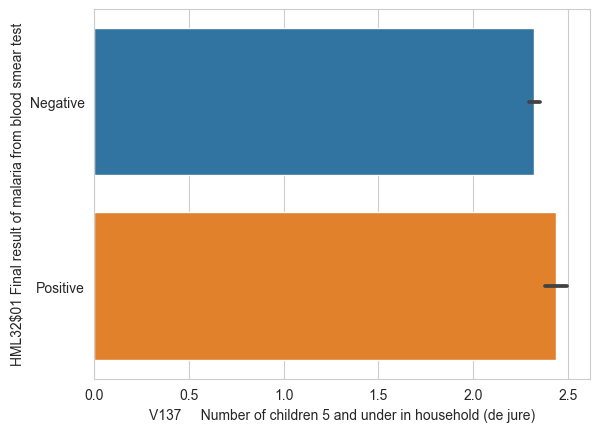

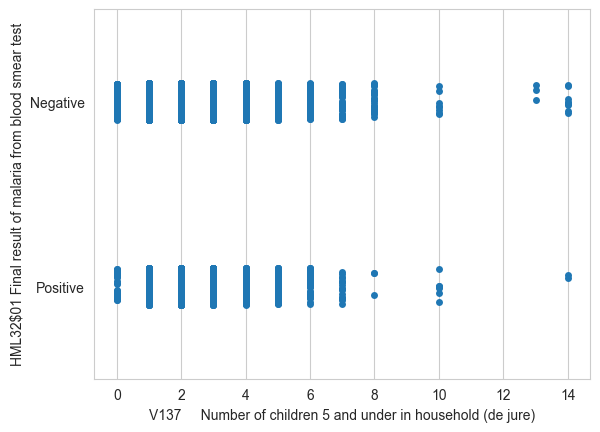

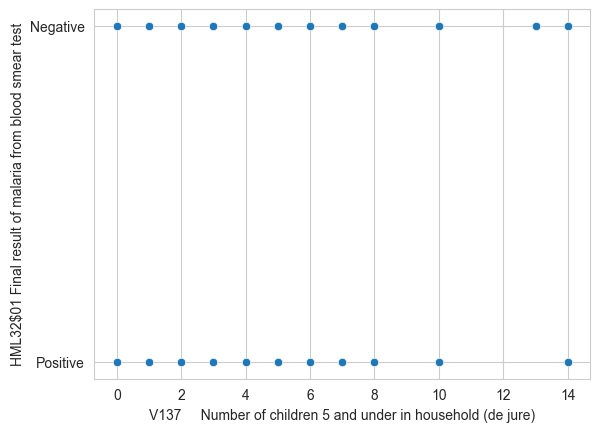

Bi variate Analysis of X =  V149     Educational attainment and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


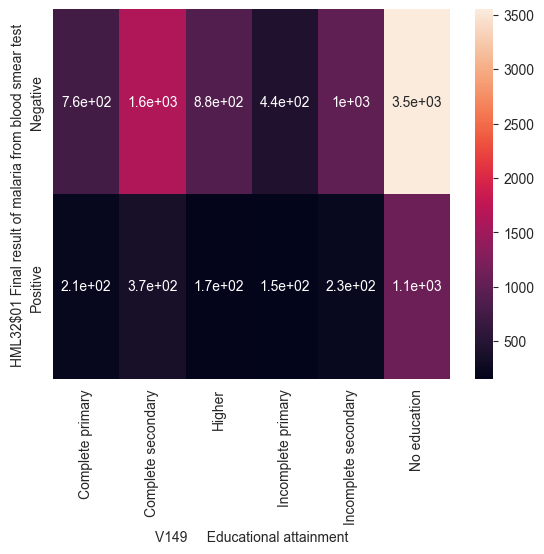

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V149     Educational attainment                                           
Complete primary                                             757       214
Complete secondary                                          1624       369
Higher                                                       879       166
Incomplete primary                                           438       152
Incomplete secondary                                         995       229
No education                                                3549      1093


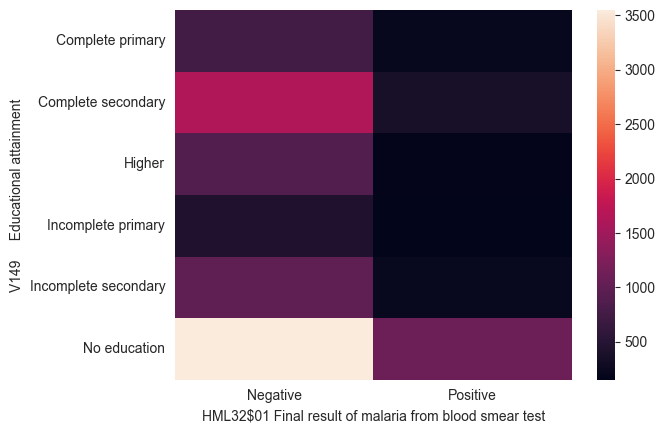

Bi variate Analysis of X =  V151     Sex of household head and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


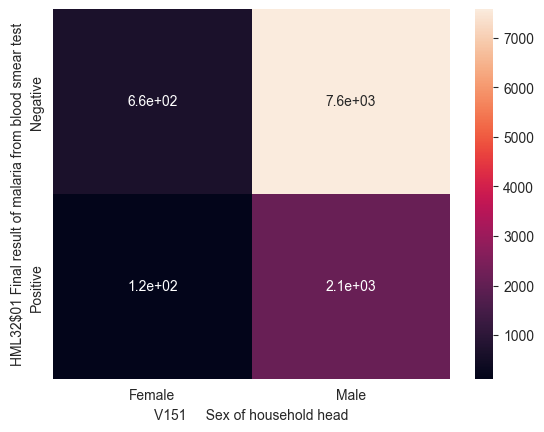

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V151     Sex of household head                                            
Female                                                       662       119
Male                                                        7580      2104


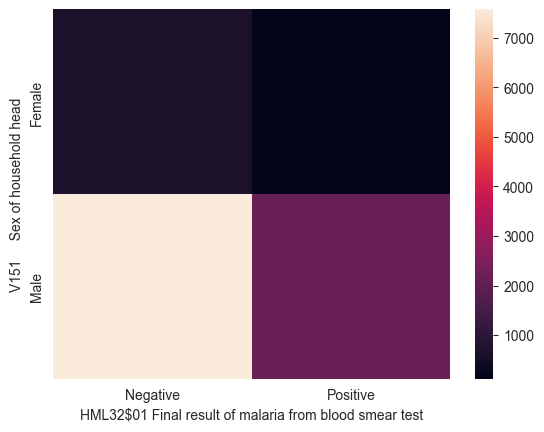

Bi variate Analysis of X =  V152     Age of household head and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


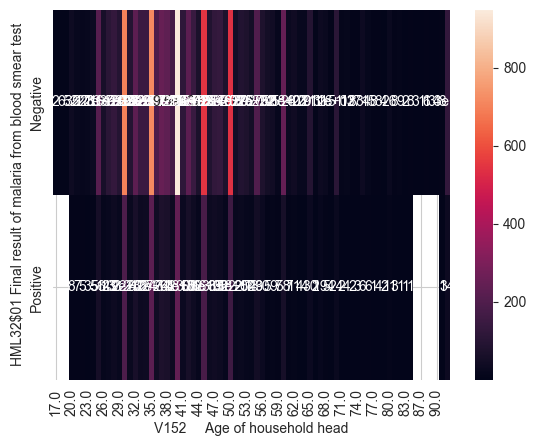

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V152     Age of household head                                            
17.0                                                           2         0
18.0                                                           6         0
19.0                                                           5         0
20.0                                                          35         8
21.0                                                          22         7
...                                                          ...       ...
88.0                                                           6         0
89.0                                                           3         0
90.0                                                           4         0
95.0                                                           8         1
Don't know                                                   127        34

[75 rows x 2 columns]


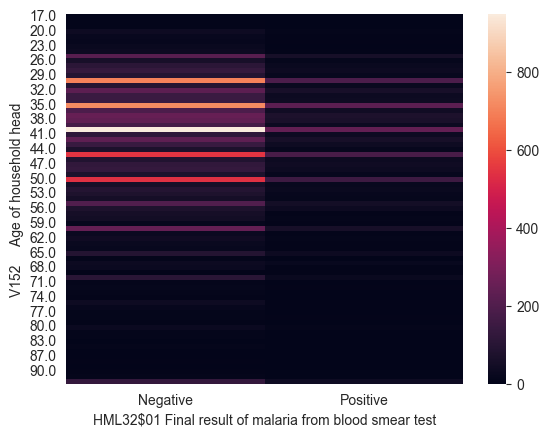

Bi variate Analysis of X =  V155     Literacy and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


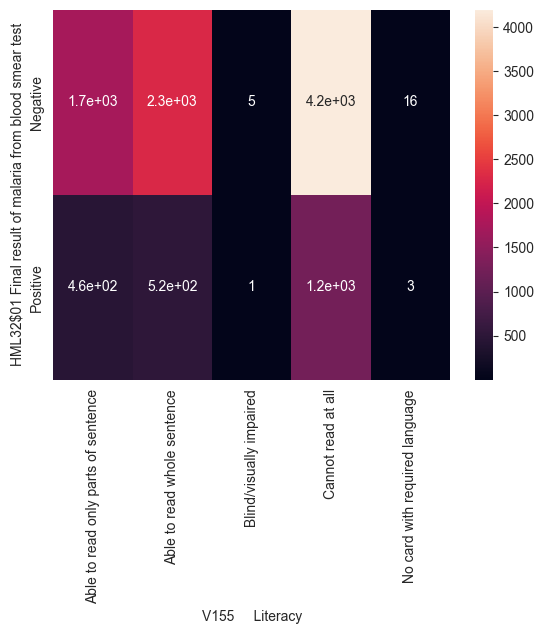

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V155     Literacy                                                         
Able to read only parts of sentence                         1732       458
Able to read whole sentence                                 2294       524
Blind/visually impaired                                        5         1
Cannot read at all                                          4195      1237
No card with required language                                16         3


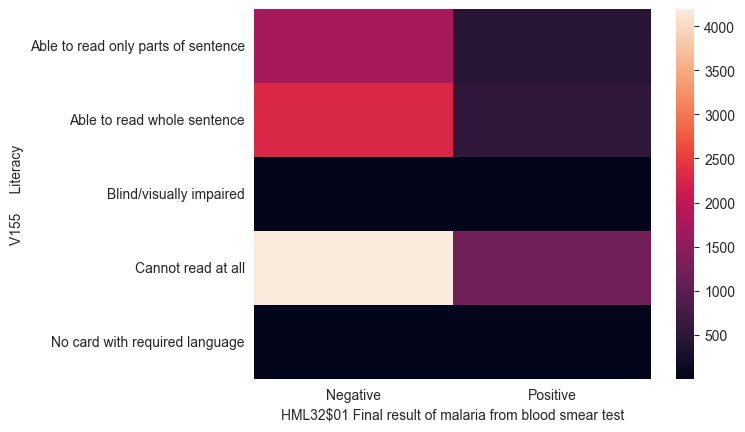

Bi variate Analysis of X =  V190     Wealth index combined and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


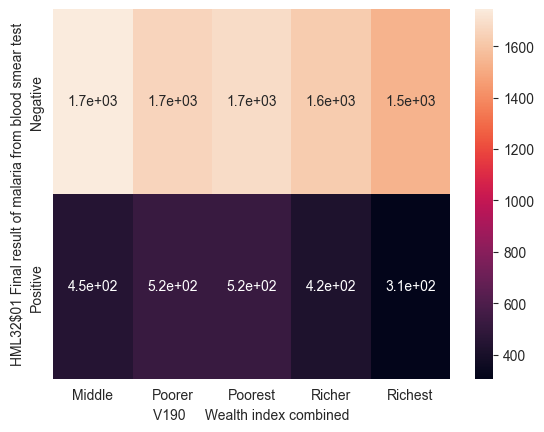

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V190     Wealth index combined                                            
Middle                                                      1744       451
Poorer                                                      1656       521
Poorest                                                     1686       525
Richer                                                      1624       420
Richest                                                     1532       306


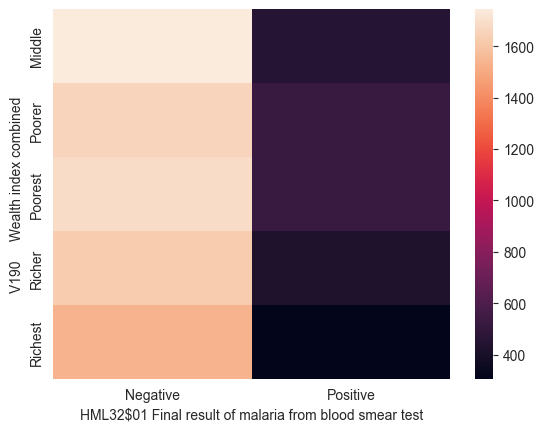

Bi variate Analysis of X =  V190A    Wealth index for urbanrural and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


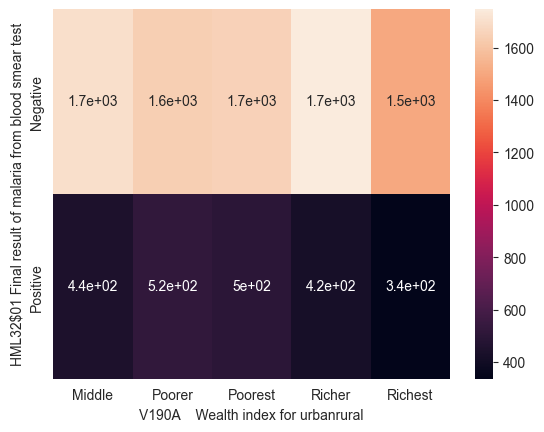

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V190A    Wealth index for urbanrural                                      
Middle                                                      1699       445
Poorer                                                      1640       523
Poorest                                                     1652       497
Richer                                                      1747       422
Richest                                                     1504       336


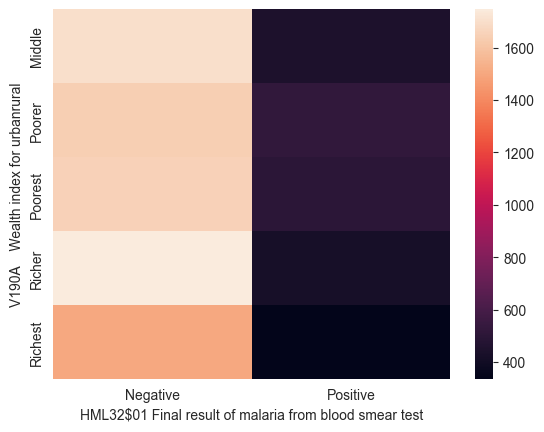

Bi variate Analysis of X =  ML101    Type of mosquito bed net(s) slept under last night and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


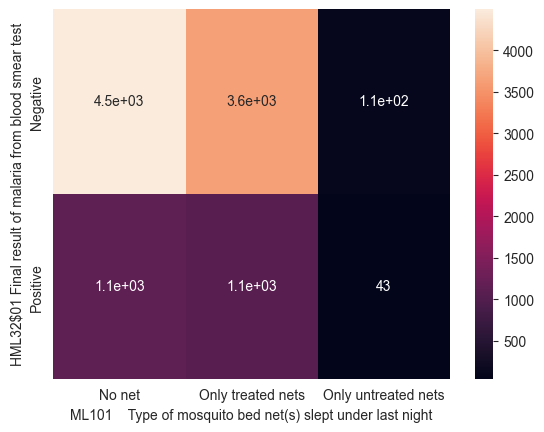

HML32$01 Final result of malaria from blood smear test  Negative  Positive
ML101    Type of mosquito bed net(s) slept unde...                        
No net                                                      4496      1126
Only treated nets                                           3634      1054
Only untreated nets                                          112        43


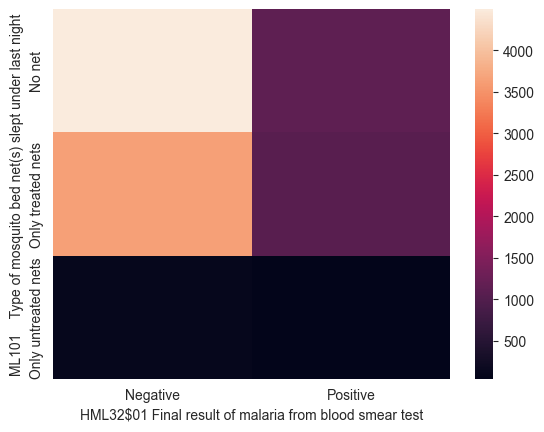

Bi variate Analysis of X =  V459     Have mosquito bed net for sleeping (from household questionnaire) and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


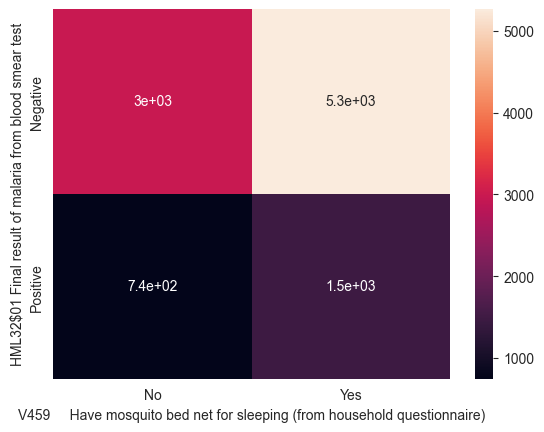

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V459     Have mosquito bed net for sleeping (fr...                        
No                                                          2974       745
Yes                                                         5268      1478


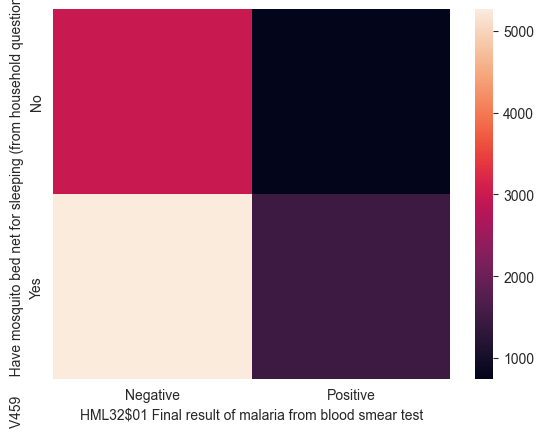

Bi variate Analysis of X =  V460     Children under 5 slept under mosquito bed net last night (household questionnaire) and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


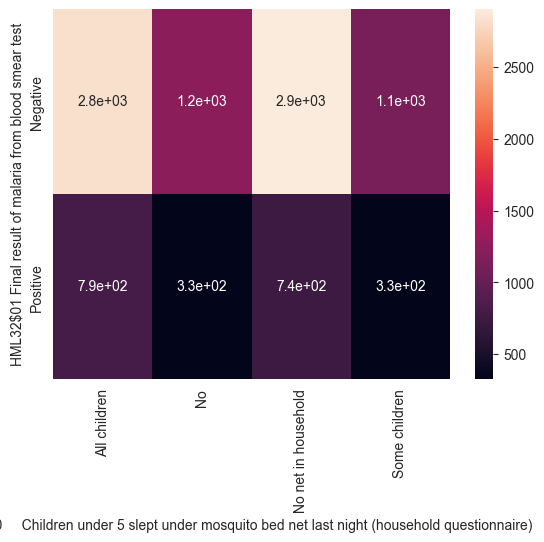

HML32$01 Final result of malaria from blood smear test  Negative  Positive
V460     Children under 5 slept under mosquito ...                        
All children                                                2832       791
No                                                          1235       328
No net in household                                         2904       737
Some children                                               1121       328


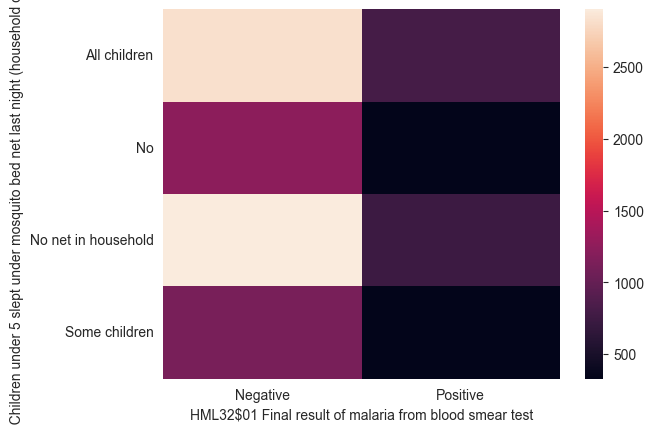

Bi variate Analysis of X =  BORD     Birth order number and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is float64


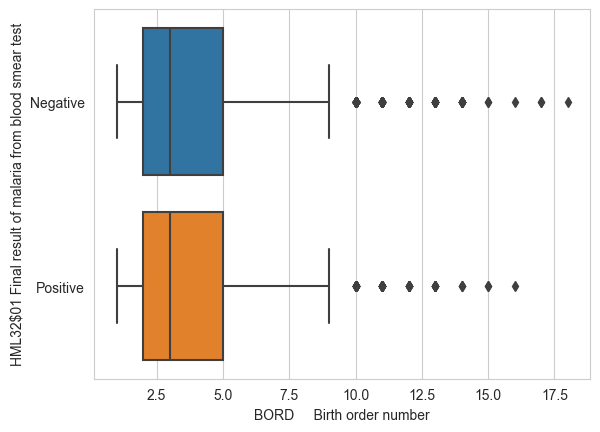

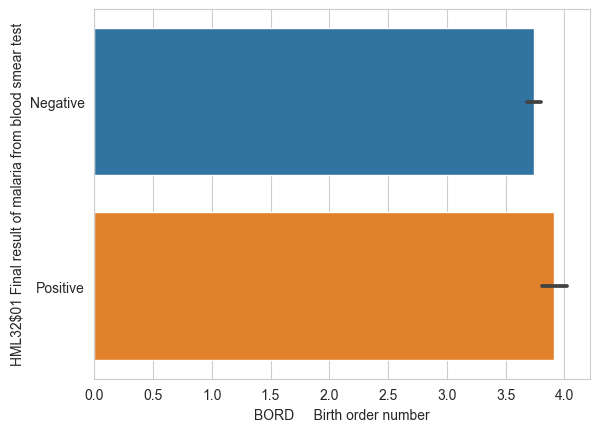

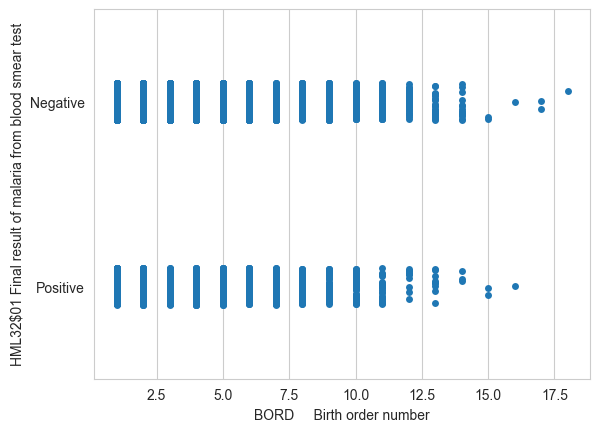

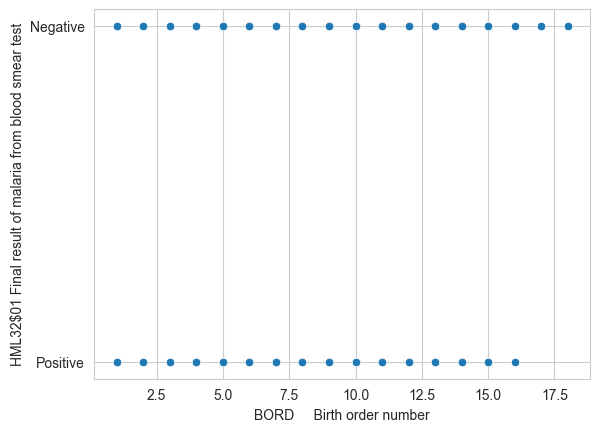

Bi variate Analysis of X =  B1       Month of birth and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is float64


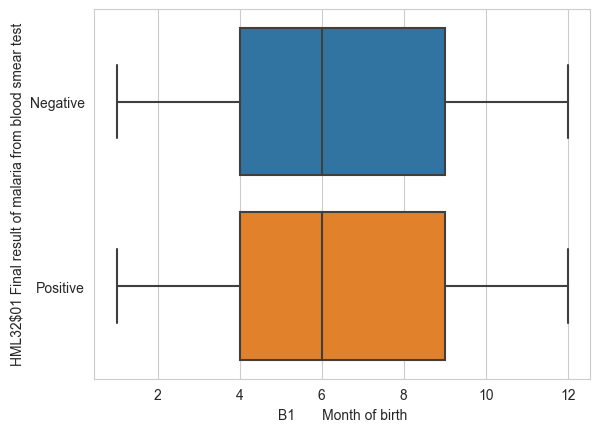

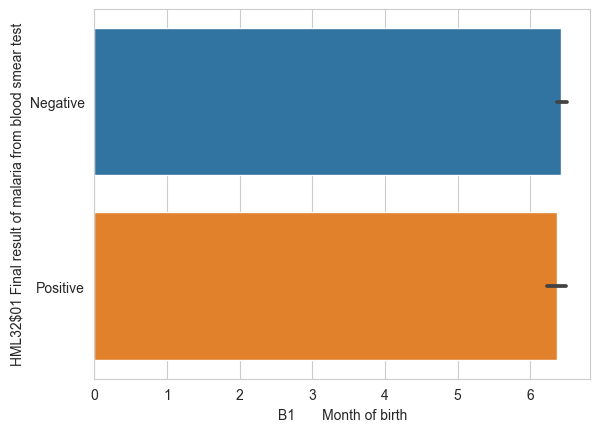

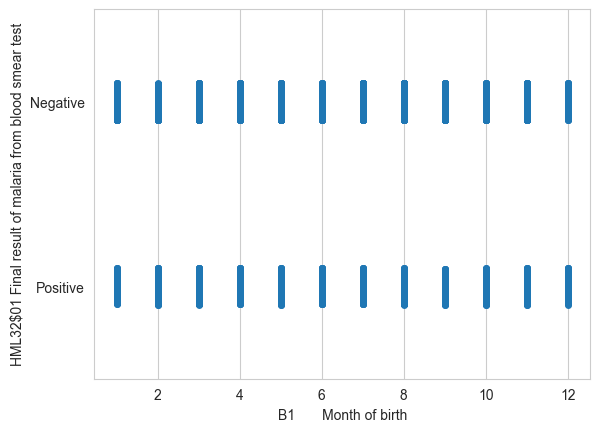

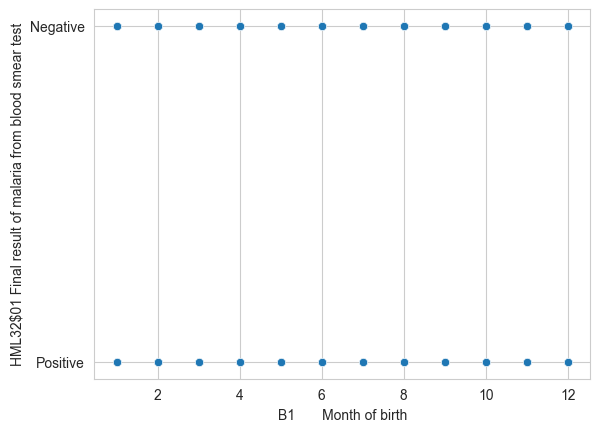

Bi variate Analysis of X =  B4       Sex of child and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


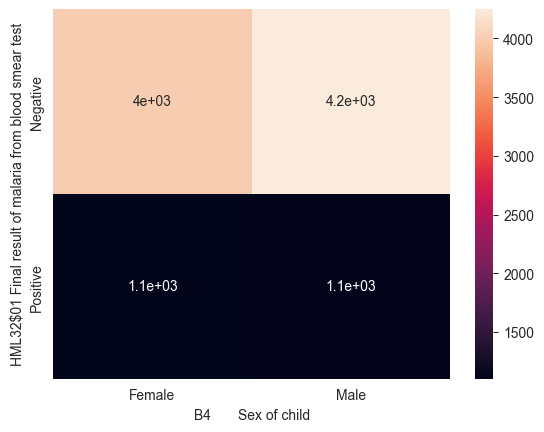

HML32$01 Final result of malaria from blood smear test  Negative  Positive
B4       Sex of child                                                     
Female                                                      3992      1102
Male                                                        4250      1121


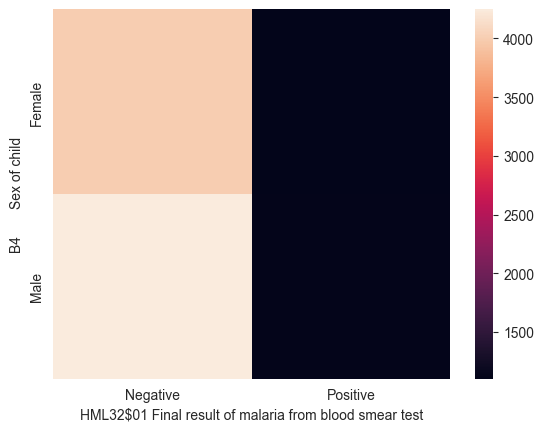

Bi variate Analysis of X =  B8       Current age of child and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is float64


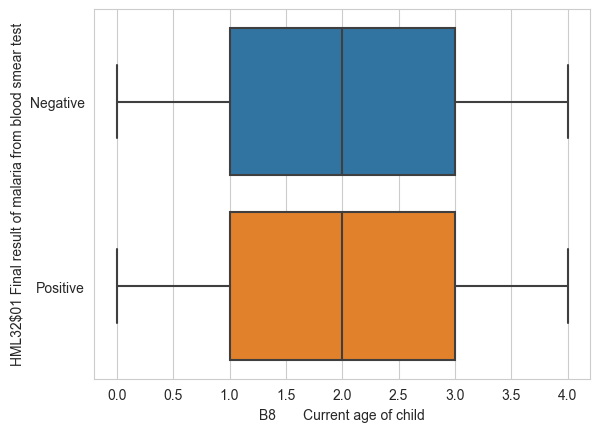

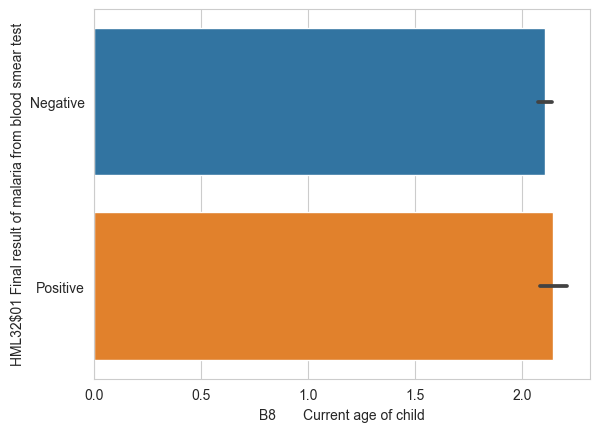

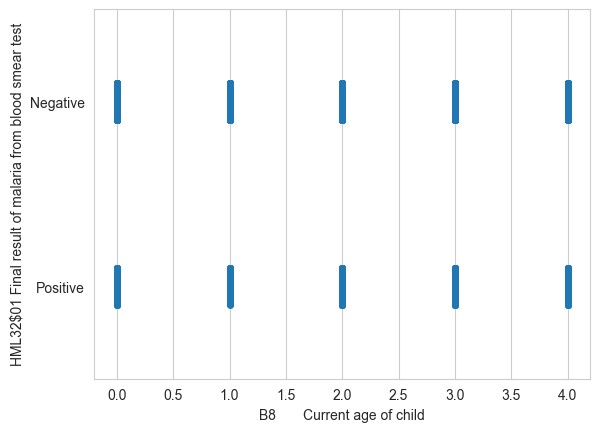

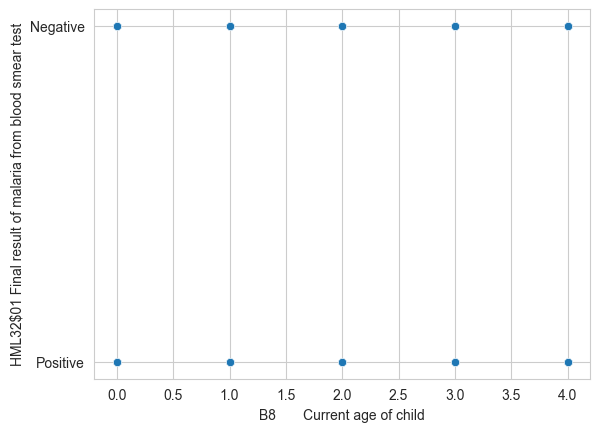

Bi variate Analysis of X =  V218     Number of living children and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is float64


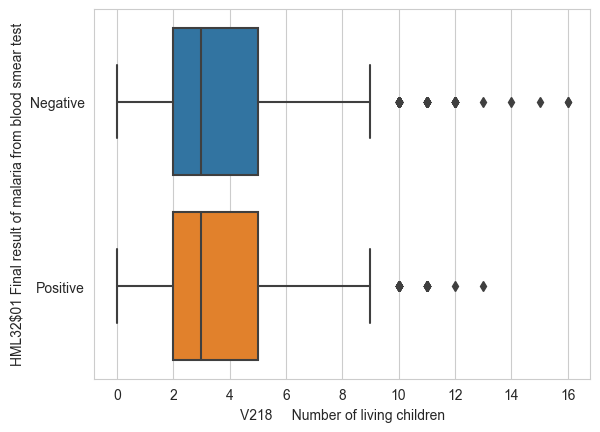

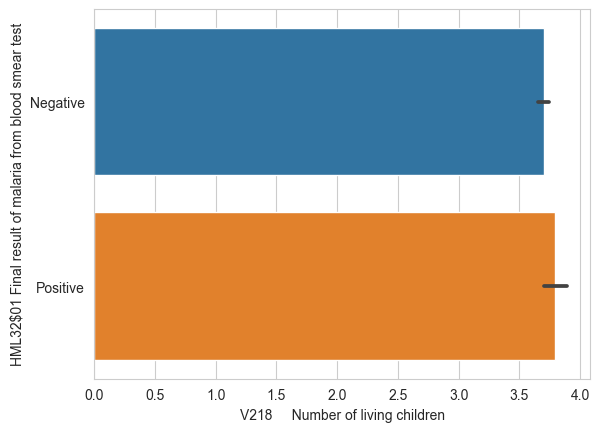

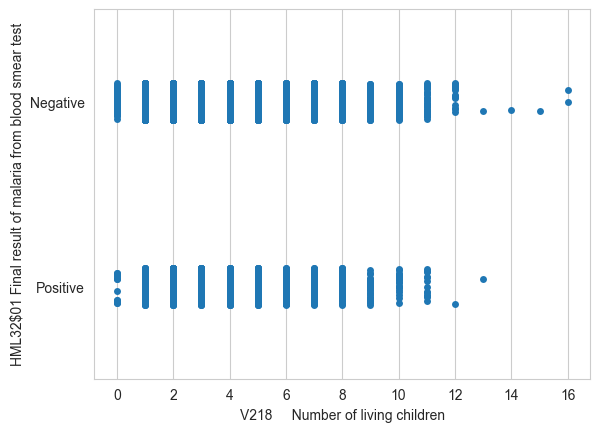

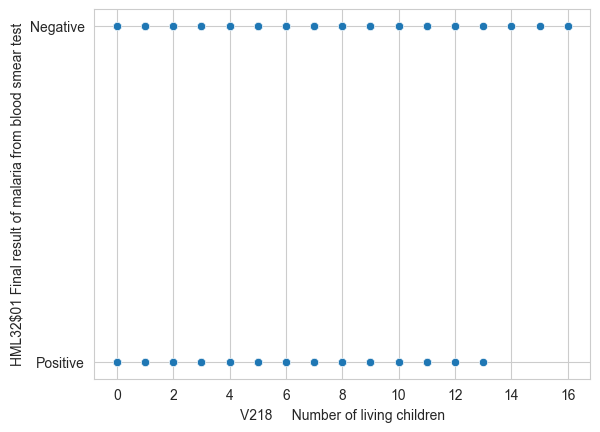

Bi variate Analysis of X =  M14      Number of antenatal visits during pregnancy and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


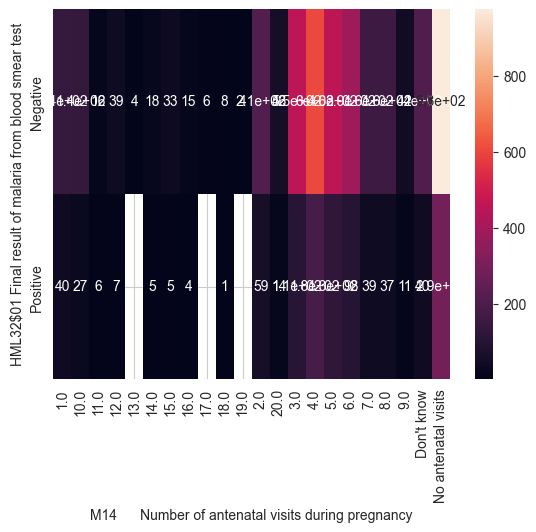

HML32$01 Final result of malaria from blood smear test  Negative  Positive
M14      Number of antenatal visits during preg...                        
1.0                                                          140        40
10.0                                                         136        27
11.0                                                          16         6
12.0                                                          39         7
13.0                                                           4         0
14.0                                                          18         5
15.0                                                          33         5
16.0                                                          15         4
17.0                                                           6         0
18.0                                                           8         1
19.0                                                           4         0
2.0                      

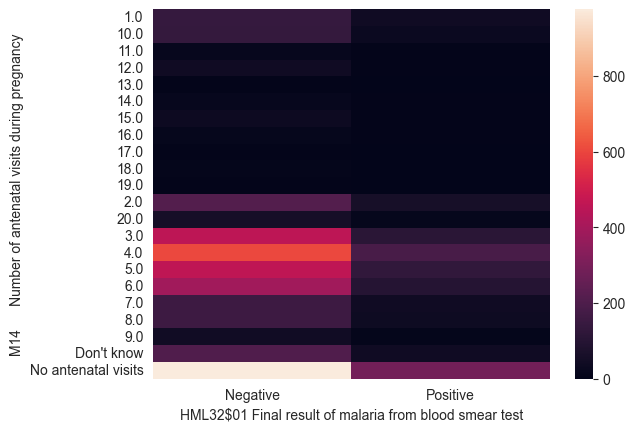

Bi variate Analysis of X =  M49A     During pregnancy took: SPfansidar for malaria and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


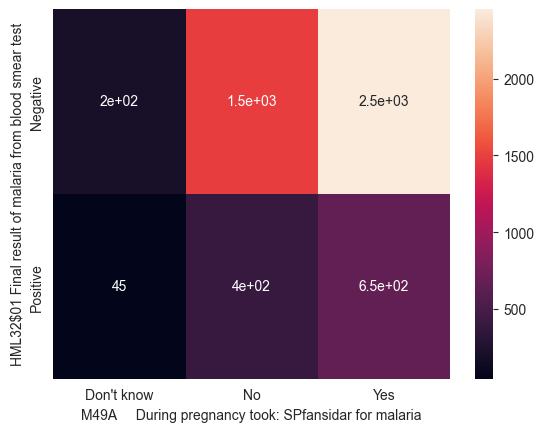

HML32$01 Final result of malaria from blood smear test  Negative  Positive
M49A     During pregnancy took: SPfansidar for ...                        
Don't know                                                   203        45
No                                                          1478       397
Yes                                                         2453       654


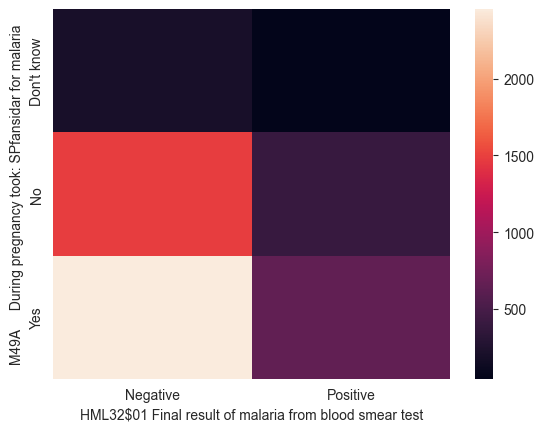

Bi variate Analysis of X =  ML1      Number of times took fansidar during pregnancy and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is float64


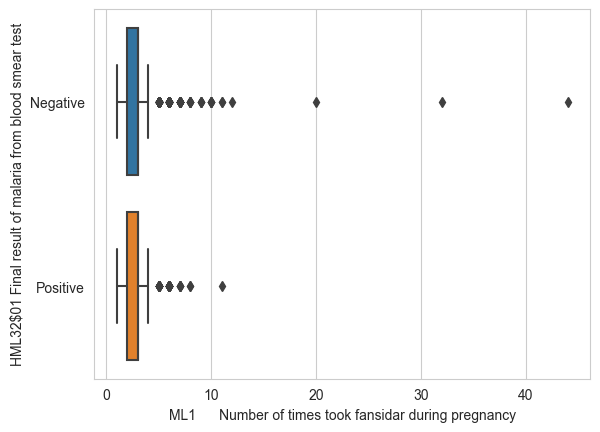

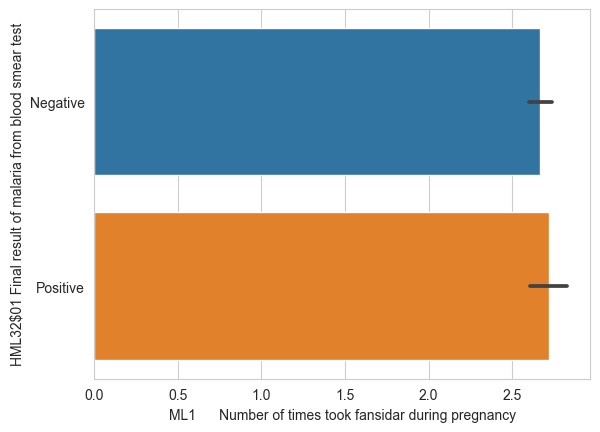

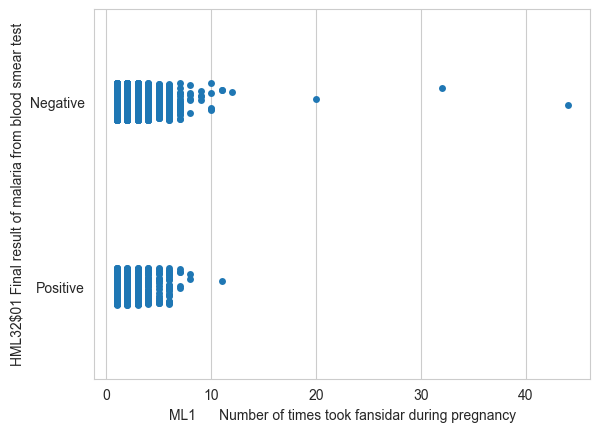

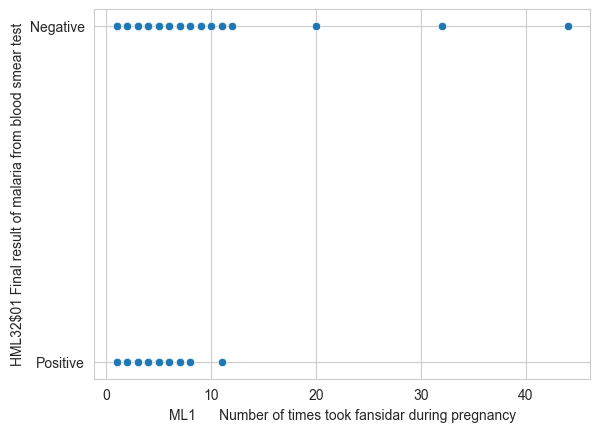

Bi variate Analysis of X =  ML0      Type of mosquito bed net(s) child slept under last night and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


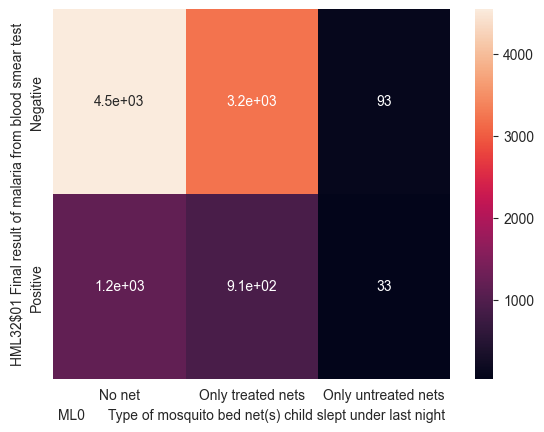

HML32$01 Final result of malaria from blood smear test  Negative  Positive
ML0      Type of mosquito bed net(s) child slep...                        
No net                                                      4546      1162
Only treated nets                                           3219       912
Only untreated nets                                           93        33


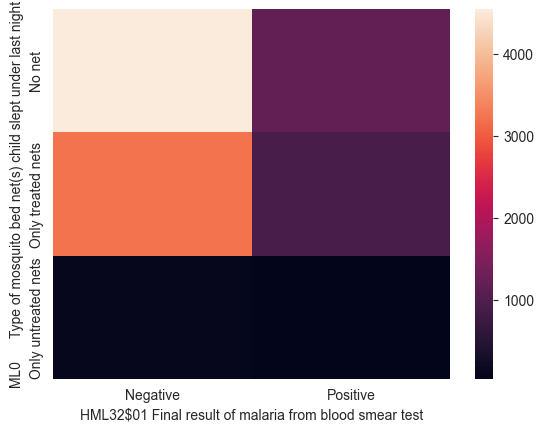

Bi variate Analysis of X =  SLGA     Local government area and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is float64


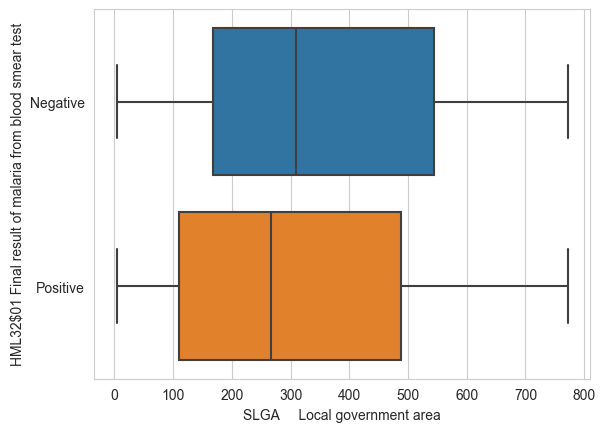

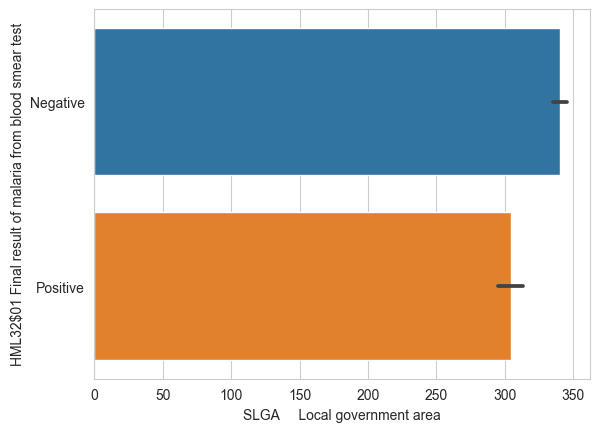

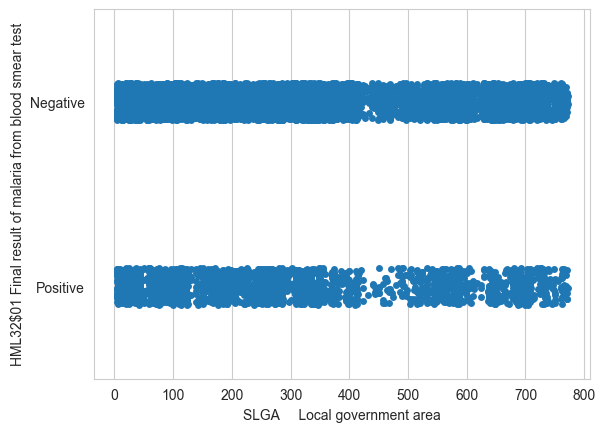

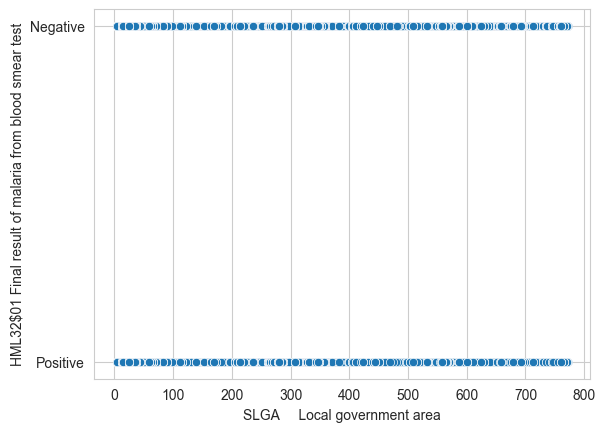

Bi variate Analysis of X =  B19      Current age of child in months (months since birth for dead children) and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is float64


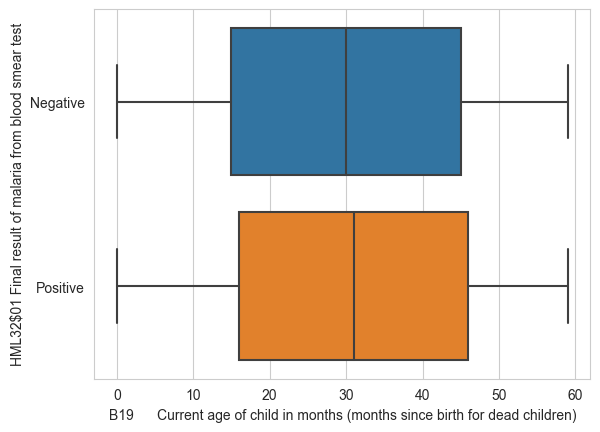

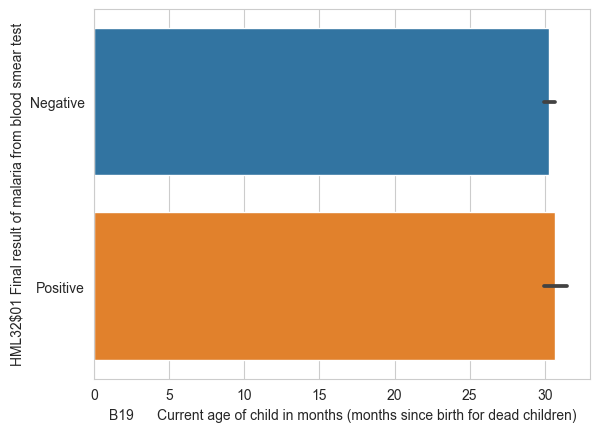

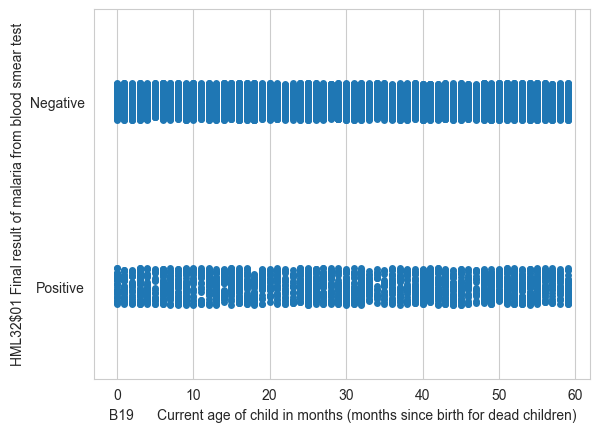

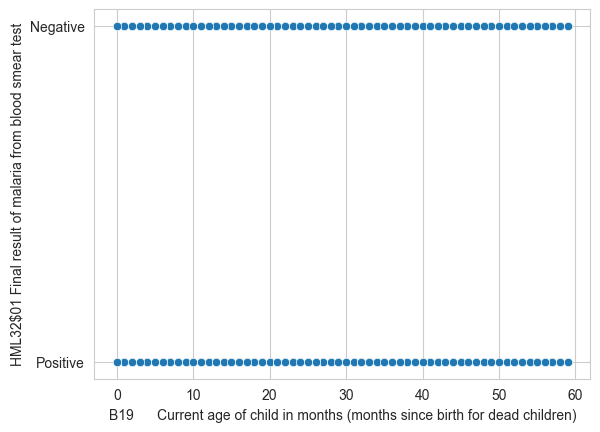

Bi variate Analysis of X =  HW1      Child's age in months and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is float64


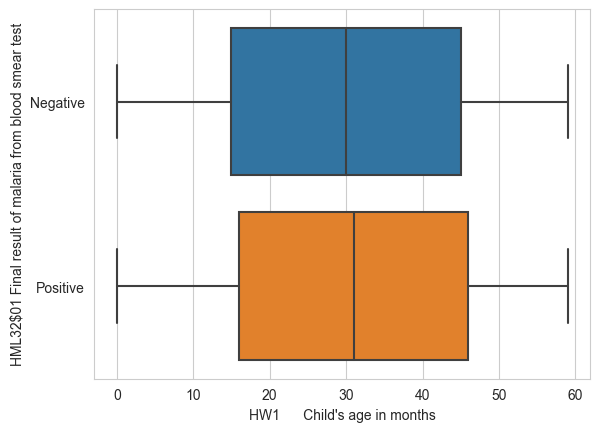

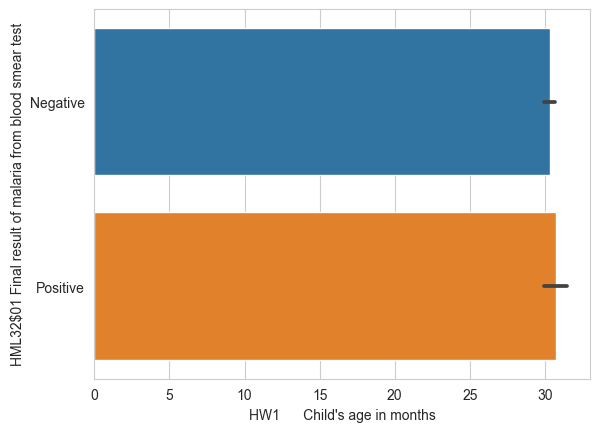

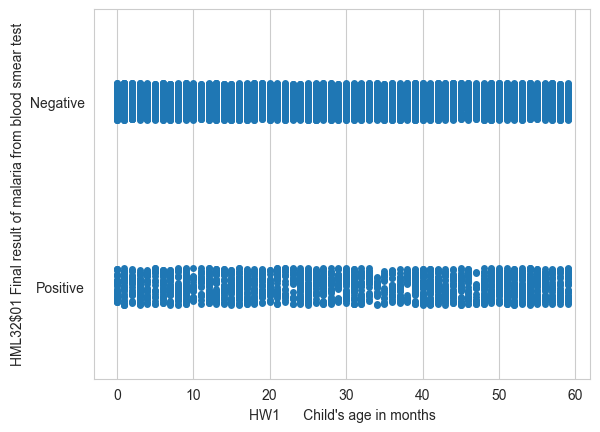

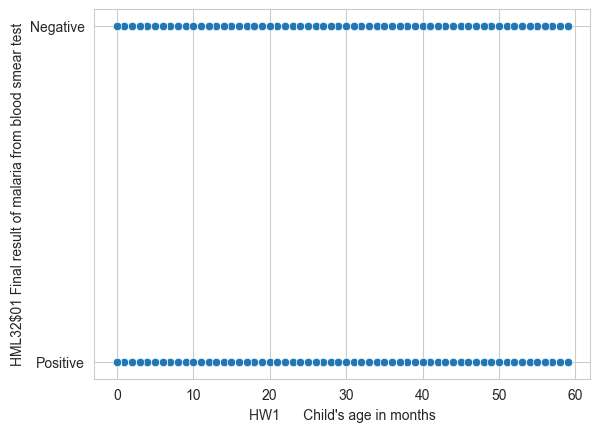

Bi variate Analysis of X =  SREGION  Region and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


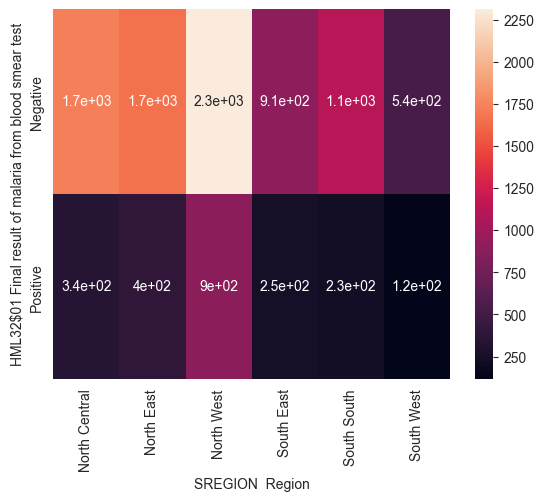

HML32$01 Final result of malaria from blood smear test  Negative  Positive
SREGION  Region                                                           
North Central                                               1725       337
North East                                                  1654       398
North West                                                  2311       895
South East                                                   906       248
South South                                                 1109       227
South West                                                   537       118


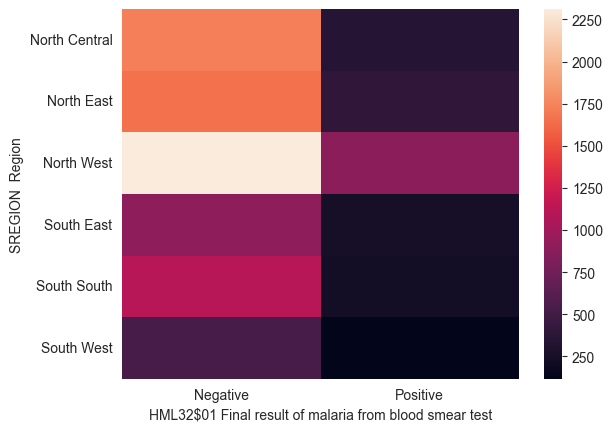

Bi variate Analysis of X =  SBONNY   Bonny State and Y =  HML32$01 Final result of malaria from blood smear test
Column data type is object


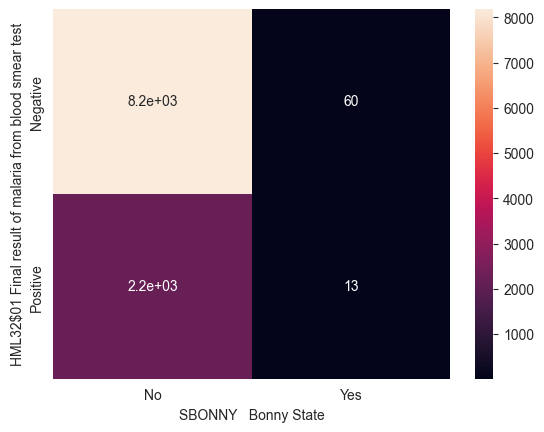

HML32$01 Final result of malaria from blood smear test  Negative  Positive
SBONNY   Bonny State                                                      
No                                                          8182      2210
Yes                                                           60        13


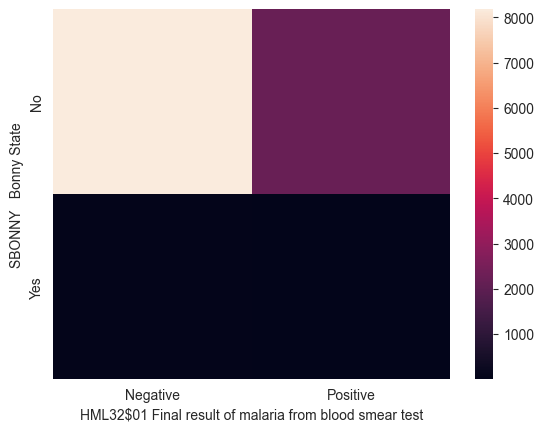

In [16]:
target = 'HML32$01 Final result of malaria from blood smear test'
err_col = []
for col in children_under_5.columns:
 if col != target:
  try:
    bi_variate_analysis(children_under_5, col, target)
  except:
   err_col.append(col)

### ..

### Statistical analysis

In [17]:
target = 'HML32$01 Final result of malaria from blood smear test'
for col in children_under_5:
 if col not in target:
   _cross_tab, stat, p, dof, expected = create_contingency_table(children_under_5, col, target)

Column name is  V024     Region
p value is 8.339014733403638e-16
Dependent (reject H0)
{'stat': 215.8696260670576, 'p_value': 8.339014733403638e-16, 'dof': 74}




Column name is  V025     Type of place of residence
p value is 0.0010179488518798777
Dependent (reject H0)
{'stat': 18.42739016107769, 'p_value': 0.0010179488518798777, 'dof': 4}




Column name is  V101     Region
p value is 8.339014733403638e-16
Dependent (reject H0)
{'stat': 215.8696260670576, 'p_value': 8.339014733403638e-16, 'dof': 74}




Column name is  V102     Type of place of residence
p value is 0.0010179488518798777
Dependent (reject H0)
{'stat': 18.42739016107769, 'p_value': 0.0010179488518798777, 'dof': 4}




Column name is  V106     Highest educational level
p value is 2.9668700138655627e-08
Dependent (reject H0)
{'stat': 50.7230992163724, 'p_value': 2.9668700138655627e-08, 'dof': 8}




Column name is  V107     Highest year of education
p value is 0.9590222740885523
Independent (H0 holds true)
{'stat': 4.968

In [18]:
from sklearn.preprocessing import LabelEncoder
target = 'HML32$01 Final result of malaria from blood smear test'
label_encoder = LabelEncoder()
for column in children_under_5.select_dtypes(include=['object']).columns:
    children_under_5[column] = label_encoder.fit_transform(children_under_5[column])

In [19]:
children_under_5 = children_under_5.fillna(children_under_5.mean())
children_under_5.isnull().sum()

V024     Region                                                                                0
V025     Type of place of residence                                                            0
V101     Region                                                                                0
V102     Type of place of residence                                                            0
V106     Highest educational level                                                             0
V107     Highest year of education                                                             0
V113     Source of drinking water                                                              0
V130     Religion                                                                              0
V131     Ethnicity                                                                             0
V136     Number of household members (listed)                                                  0
V137     Number of children 5 

In [20]:
import statsmodels.api as sm
for cols in children_under_5.columns:
 try:
  _data = copy.deepcopy(children_under_5)
  X2 = sm.add_constant(_data[cols])
  est = sm.OLS(children_under_5[target].astype(float), X2)
  est2 = est.fit()
  est2
  print(est2.pvalues)
 except:
  print('error')
  print(col)

const              1.805324e-112
V024     Region     1.764547e-05
dtype: float64
const                                  0.000000
V025     Type of place of residence    0.000018
dtype: float64
const              1.805324e-112
V101     Region     1.764547e-05
dtype: float64
const                                  0.000000
V102     Type of place of residence    0.000018
dtype: float64
const                                 5.517026e-182
V106     Highest educational level     5.945835e-02
dtype: float64
const                                 4.966809e-12
V107     Highest year of education    8.888771e-01
dtype: float64
const                                3.353755e-46
V113     Source of drinking water    1.840367e-01
dtype: float64
const                1.422838e-218
V130     Religion     3.186756e-04
dtype: float64
const                 9.241940e-120
V131     Ethnicity     3.582206e-05
dtype: float64
const                                            7.599833e-111
V136     Number of household m

In [21]:
children_under_5.to_csv('children_under5.csv', header=True, index=False)